# Axie Infinity White Paper Summary

## 1. Introduction

Axie infinity는 포켓몬에서 영감을 받았으며 같이 주어진 pet을 수집, 육성, 전투를 진행하며 자신의 영토를 짓는 것을 기반으로 하는 게임이다.

- 이더리움 마켓 일/주/월 사용자 1위 게임
- 총 매출 6,400ETH

## 2. Game Play

1. Battling
  - Idle Heroes와 Final Fantasy Tactics에서 영향을 받음
  - Real-time card battle system
  - Tournaments & Esports

2. Breeding
  - 개체수 유지 및 hyperinflation 방지를 위해 최대 7번 교배 가능
  - 비용: 0.005ETH + Small Love Potions(SLP)
Breed 횟수에 따라서 SLP 비용이 증가함 (min: 100~ max: 1700)
  - 세 가지 특성을 지니고 있으며 각각 다른 유전 확률을 가지고 있음
  - Dominant: 37.5%
  - Recessive: 9.375%
  - Minor Recessive: 3.125%
  - 성장에 총 5일이 걸리며 3일이 지나야 특성을 열람할 수 있다.

3. Land
  - 플레이어는 세계관인 Lunacia의 땅 일부를 매입하고 개발한다.
  - 매입한 땅에 건물을 지어 Axie에 성장이 되는 건물을 지을 수 있다.
  - AXS 토큰을 사용하여 땅을 매입할 수 있으며 빈 토지를 탐험하면서 AXS 토큰을 얻을 수도 있다.
  - Lunancia의 땅은 Non-Fungible Tokens 이며 교환 가능하다

## 3. Axie Infinity Shards - $AXS

- Axie Universe 전역에서 사용되는 토큰이며 ERC20 기반이다.
- AXS holder는 다음과 같은 방법으로 보상을 얻는다.
    1. Staking the tokens (암호 화폐의 일정량을 지분으로 고정시키는 행위)
    2. Play the game
    3. Participate in governance votes

1. Play to Earn
  - Play to earn 토큰의 주 목적은 유저를 유치하고 활동적인 커뮤니티 회원에게 소유권과 지분을 제공하는데 있다.
  - Axie ecosystem의 마케팅 자원이라고 보면 된다.
  - 특정 게임 모드와 상품들이 추후 더 제공될 시에 할당량이 늘어날 수도 있다.

2. Staking and Staking Rewards
  - 3/6/12월 단위로 yield 줌

3. Ecosystem Fund
  - Community 운용 비용

4. Sky Mavis
  - 개발자들 월급

## 4. Community
- 개발자와 사용자 모두가 이득을 얻는 구조로 빠른 속도로 성장 중
- PC나 콘솔 게임에 비해서는 규모가 작지만 NFT project을 기반으로 하고 있는 게임에서는 유저 규모와 자금 이동 규모가 가장 크다.

## 5. Decentralized Organization

- 커뮤니티 중심의 완전한 탈중화를 목표로 하고 있다.
→ 2023년 10월을 기점으로 Sky Mavis보다 유저들의 voting power가 더 커질 것으로 예상
- 2023년 AXS holder 들의 투표를 통해 governance framework 정할 예정 (완전 탈중화)

## 6. Reference

Model Referecne
- https://www.kaggle.com/prashant111/catboost-classifier-in-python
- https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb
- https://catboost.ai/
- https://www.kaggle.com/aharless/simple-catboost-cv-lb-281

Financial Analysis Reference
- https://towardsdatascience.com/financial-analytics-exploratory-data-analysis-of-stock-data-d98cbadf98b9

Axie Infinity Analysis Reference
- https://www.youtube.com/watch?v=4H7igOHGlp4
- https://www.youtube.com/watch?v=lzBP5O_Jv-g
- https://www.youtube.com/watch?v=2amrMto63Dg
- [Axie White Paper](https://whitepaper.axieinfinity.com/axs/allocations-and-unlock/private-sale)
- [Axie Infinity Getting Started](https://axie.substack.com/p/axie-community-alpha-getting-started)

# Part 1 - Axie Infinity EDA & 도메인 지식 습득

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

sns.set(style='darkgrid', rc={'figure.figsize':(15,6)})

## 1. Axie Financial Events

In [2]:
axie_financial_events = pd.read_json('axie_financial_events_20210115_v2.jsonl', lines=True)

In [3]:
axie_financial_events.head()

,partition_id,block_timestamp,nft_transaction_hash,transactions,entity_id,event_type,data_consistency_status,items_sent,items_received,items_sent_count,...,erc20s,gas_used_eth,gas_used_usd,superset_id,transaction_type,transaction_subtype,nft_transfer_type,nft_transfer_subtype,entity_type,item_send_transfer_type
0,axie,2019-08-27 20:18:01 UTC,0x8dde6583d7b5819dc4d55dc3def141faae33c5ff4bda...,[{'transaction_hash': '0x8dde6583d7b5819dc4d55...,0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8,buy,unknown,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0x9e8534fd246256abc96b3ff...,-0.001005,-0.189291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,axie,2019-08-26 10:41:02 UTC,0x331d9bec49938783465e456b28072d655c903615ec71...,[{'transaction_hash': '0x331d9bec49938783465e4...,0x84957e6c9f6ccfed9c35c850c3903732ed90858a,buy,unknown,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0xda108db8739d269ef127b99...,-0.000424,-0.079043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,axie,2018-11-09 08:16:50 UTC,0x98135b8837820fb12745b6c11f078751117e24ac95b0...,[{'transaction_hash': '0x98135b8837820fb12745b...,0xdc59bdbf8a404a6663505cad3d40890f8aade79f,buy,complete,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0x00000000000000000000000...,-0.001228,-0.261995,axie_directsale_eth,NaN,NaN,NaN,NaN,NaN,NaN
3,axie,2018-10-27 19:23:48 UTC,0xece07ef0ff30bc473c1487c94e6587d5ea1cc389be1f...,[{'transaction_hash': '0xece07ef0ff30bc473c148...,0x20eb02ce7aa8cf1ab840e8fa161359a6c2464523,buy,complete,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0x00000000000000000000000...,-0.002707,-0.550604,axie_directsale_eth,NaN,NaN,NaN,NaN,NaN,NaN
4,axie,2018-10-24 19:36:51 UTC,0x1a47a2973aef294ac37f776d22dcaca9c6c2e32e268d...,[{'transaction_hash': '0x1a47a2973aef294ac37f7...,0x73601fd195e1c6407e21845ed40b0c9d61c37ab1,buy,complete,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0x00000000000000000000000...,-0.002835,-0.578556,axie_directsale_eth,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 불필요한 열들은 제거하거나 합쳤다.
df_financial_prep_v1 = axie_financial_events[axie_financial_events['data_consistency_status'] == 'complete']
df_financial_prep_v2 = df_financial_prep_v1[df_financial_prep_v1['event_type'] == 'sell']
df_financial_prep_v3 = df_financial_prep_v2.drop(columns=['partition_id', 'data_consistency_status', 'superset_id'])
df_financial_prep_v3['item_id'] = df_financial_prep_v3['items_sent'] + df_financial_prep_v3['items_received']
df_financial_prep_v4 = df_financial_prep_v3.drop(columns=['items_sent', 'items_received', 'item_receive_transfer_type', 'item_send_transfer_type', 'nft_transaction_hash', 'entity_id', 'event_type', 'items_sent_count'])

# item metadata column과 합치기 위하여 items_id를 전처리 하였다.
id_list = df_financial_prep_v4['item_id'].to_list()
id_list_prep = []
for row in id_list:
  id_list_prep.append(int(row[0]['item_id'].split('_')[1]))
df_financial_prep_v4['item_id'] = id_list_prep

# 값이 하나인 column 제거
df_financial_prep_v5 = df_financial_prep_v4[df_financial_prep_v4['transaction_subtype'] == 'matched']
df_financial_prep_v6 = df_financial_prep_v5.drop(columns=['entity_type', 'items_received_count', 'transaction_type', 'transaction_subtype', 'nft_transfer_type', 'nft_transfer_subtype', 'entity_type'])

# 음수 값 양수 값으로 변환
df_financial_prep_v6['gas_used_eth'] = df_financial_prep_v6['gas_used_eth'] * -1
df_financial_prep_v6['gas_used_usd'] = df_financial_prep_v6['gas_used_usd'] * -1

In [5]:
erc20_list = df_financial_prep_v6['erc20s'].to_list()
eth_list = []
usd_list = []

for row in erc20_list:
  eth_list.append(row[0]['received_eth'])
  usd_list.append(row[0]['received_usd'])

df_financial_prep_v6['received_eth'] = eth_list
df_financial_prep_v6['received_usd'] = usd_list

df_financial_prep_v7 = df_financial_prep_v6.drop(columns=['erc20s'])

In [6]:
transaction_list = df_financial_prep_v7['transactions'].to_list()
block_created_timestamp = []
block_event_type = []

for row in transaction_list:
  if len(row) == 2:
    block_created_timestamp.append(row[0]['block_timestamp'])
    block_event_type.append(row[0]['event_subtype'])
  else:
    block_created_timestamp.append(None)
    block_event_type.append(None)

df_financial_prep_v7['block_created_timestamp'] = block_created_timestamp
df_financial_prep_v7['created_event_subtype'] = block_event_type

df_financial_prep_v8 = df_financial_prep_v7.drop(columns=['transactions', 'created_event_subtype'])

df_financial_prep_v8.reset_index(inplace=True)
df_financial_prep_v8.drop(columns=['index'], inplace=True)

df_financial_prep_v8['block_created_timestamp'] = pd.to_datetime(df_financial_prep_v8['block_created_timestamp'])
df_financial_prep_v8['block_timestamp'] = pd.to_datetime(df_financial_prep_v8['block_timestamp'])

In [7]:
df_financial_prep_v8['window'] = df_financial_prep_v8['block_timestamp'] - df_financial_prep_v8['block_created_timestamp']

window_list = []
for row in df_financial_prep_v8['window']:
  if row.days <= 7:
    window_list.append(1)
  elif row.days > 6 and row.days <=14:
    window_list.append(2)
  elif row.days > 14 and row.days <= 30:
    window_list.append(3)
  else:
    window_list.append(4)

df_financial_prep_v8['window'] = window_list
df_financial = df_financial_prep_v8.drop(columns = ['block_created_timestamp'])

financial_time_list = []
pd.to_datetime(datetime.strftime(df_financial['block_timestamp'][0], '%Y-%m-%d %H:%M:%S'))

for row in df_financial['block_timestamp']:
  financial_time_list.append(datetime.strftime(row, '%Y-%m-%d %H:%M:%S'))

df_financial['block_timestamp'] = pd.to_datetime(financial_time_list)

In [8]:
df_financial

,block_timestamp,gas_used_eth,gas_used_usd,item_id,received_eth,received_usd,window
0,2019-06-11 00:15:23,-0.000000,-0.000000,40626,0.005979,1.478342,1
1,2019-06-16 17:57:53,-0.000000,-0.000000,51322,0.007779,2.085542,1
2,2019-06-12 00:06:10,-0.000000,-0.000000,30035,0.005936,1.454973,1
3,2019-06-07 14:13:35,-0.000000,-0.000000,19312,0.006519,1.629495,1
4,2019-07-27 07:06:13,-0.000000,-0.000000,60306,0.006511,1.429701,1
...,...,...,...,...,...,...,...
129397,2020-11-22 16:01:27,0.005426,2.978132,148728,0.057475,31.544434,1
129398,2020-11-22 07:41:49,0.009628,4.898552,80497,0.076600,42.041306,1
129399,2020-11-22 17:01:17,0.003501,1.666606,60704,0.078315,42.982497,1
129400,2020-11-15 00:20:02,0.003326,1.540314,65785,0.057450,26.583172,1


In [9]:
# financial_col = tt.columns.to_list()
# for col in financial_col:
#   try:
#     print('# Column Name: ', col)
#     print(tt[col].unique())
#     print(tt[col].value_counts())
#     if tt[col].isna().sum() > 0:
#       print('Number of NaN value: ', tt[col].isna().sum())
#     print()
#   except:
#     print("unique module not working")
#     print()

## 2. Axie item metadata

In [10]:
axie_item = pd.read_json('axie_item_metadata.jsonl', lines=True)

In [11]:
# axie_item_v2 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/axie_item_metadata_v2.jsonl', lines=True)

In [12]:
df_metadata_prep_v1 = axie_item.drop(columns = ['father',	'fatherClass','mother',	'motherClass'])

time_list = []
for row in axie_item['block_timestamp']:
  time_list.append(row[:19])

df_metadata_prep_v1['block_timestamp'] = pd.to_datetime(time_list)

In [13]:
df_metadata_prep_v1

,item_id,block_timestamp,stage,level,breedCount,pureness,is_mouth_mystic,is_tail_mystic,is_horn_mystic,is_back_mystic,...,tail_move_total_points,tail_move_attack,tail_move_defense,tail_move_accuracy,tail_move_name,tail_move_type,eyes_class,eyes_name,ears_class,ears_name
0,174001,2020-11-02 07:36:32,1,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,225020,2020-12-13 08:46:48,2,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,196148,2020-11-21 07:26:19,1,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,235363,2020-12-21 08:42:11,1,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,216308,2020-12-06 07:54:16,1,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442649,119132,2020-10-21 04:20:21,4,1,1,4,False,False,False,False,...,114.0,17.0,7.0,90.0,Numbing Lecretion,ranged,aquatic,Telescope,beast,Nut Cracker
442650,11239,2020-10-21 18:42:01,4,1,5,4,False,False,False,False,...,114.0,17.0,7.0,90.0,Numbing Lecretion,ranged,bird,Robin,beast,Puppy
442651,6961,2020-10-23 06:11:23,4,1,6,4,False,False,False,False,...,114.0,17.0,7.0,90.0,Numbing Lecretion,ranged,beast,Puppy,beast,Zen
442652,58577,2020-10-22 07:33:10,4,1,3,4,False,False,False,False,...,114.0,17.0,7.0,90.0,Numbing Lecretion,ranged,aquatic,Telescope,aquatic,Gill


In [14]:
financial_time = []
for row in df_financial['block_timestamp']:
  financial_time.append(datetime.strftime(row, '%Y-%m-%d'))

df_financial['time'] = pd.to_datetime(financial_time)

metadata_time = []
for row in df_metadata_prep_v1['block_timestamp']:
  metadata_time.append(datetime.strftime(row, '%Y-%m-%d'))

df_metadata_prep_v1['time'] = pd.to_datetime(metadata_time)

In [15]:
# financial data와 합치기
df_merge = pd.merge(df_financial, df_metadata_prep_v1, on=["item_id"], how='left')
df_merge.sort_values(by=['item_id'], inplace=True)
df_merge

,block_timestamp_x,gas_used_eth,gas_used_usd,item_id,received_eth,received_usd,window,time_x,block_timestamp_y,stage,...,tail_move_attack,tail_move_defense,tail_move_accuracy,tail_move_name,tail_move_type,eyes_class,eyes_name,ears_class,ears_name,time_y
264565,2020-07-08 08:21:58,0.001050,0.224675,6,5.745000,1372.850941,4,2020-07-08,2020-10-20 14:02:33,4,...,23.0,5.0,74.0,Scale Dart,ranged,reptile,Tricky,bug,Ear Breathing,2020-10-20
270199,2020-12-06 09:00:30,0.002900,1.727879,6,6.783385,4042.350878,1,2020-12-06,2020-12-07 07:55:19,4,...,23.0,5.0,74.0,Scale Dart,ranged,reptile,Tricky,bug,Ear Breathing,2020-12-07
264566,2020-07-08 08:21:58,0.001050,0.224675,6,5.745000,1372.850941,4,2020-07-08,2020-12-07 07:55:19,4,...,23.0,5.0,74.0,Scale Dart,ranged,reptile,Tricky,bug,Ear Breathing,2020-12-07
270198,2020-12-06 09:00:30,0.002900,1.727879,6,6.783385,4042.350878,1,2020-12-06,2020-10-20 14:02:33,4,...,23.0,5.0,74.0,Scale Dart,ranged,reptile,Tricky,bug,Ear Breathing,2020-10-20
220666,2018-04-05 12:51:04,0.000357,0.135868,6,0.976423,371.315982,1,2018-04-05,2020-12-07 07:55:19,4,...,23.0,5.0,74.0,Scale Dart,ranged,reptile,Tricky,bug,Ear Breathing,2020-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128150,2021-01-14 01:24:33,0.009277,9.698309,244374,0.083736,94.789932,1,2021-01-14,2021-01-15 07:18:51,3,...,24.0,9.0,74.0,Tail Slap,melee,aquatic,Gero,aquatic,Inkling,2021-01-15
322616,2021-01-15 17:00:07,0.009277,9.698309,244377,0.044221,53.813777,1,2021-01-15,2021-01-14 19:16:45,3,...,24.0,9.0,74.0,Tail Slap,melee,reptile,Topaz,beast,Nyan,2021-01-14
322617,2021-01-15 17:00:07,0.009277,9.698309,244377,0.044221,53.813777,1,2021-01-15,2021-01-16 07:10:30,4,...,24.0,9.0,74.0,Tail Slap,melee,reptile,Topaz,beast,Nyan,2021-01-16
322618,2021-01-15 17:00:07,0.009277,9.698309,244377,0.044221,53.813777,1,2021-01-15,2021-01-27 07:05:47,4,...,24.0,9.0,74.0,Tail Slap,melee,reptile,Topaz,beast,Nyan,2021-01-27


In [16]:
df_merge['time_diff'] = df_merge['time_x'] - df_merge['time_y']

time_diff_list = []
for row in df_merge['time_diff']:
  time_diff_list.append(abs(row.days))  

df_merge['time_diff'] = time_diff_list
df_merge.sort_values(by=['block_timestamp_x', 'time_diff', 'item_id'], inplace=True)
df_merge_prep_v1 = df_merge[df_merge['time_diff'] < 3]
df_merge_prep_v2 = df_merge_prep_v1.groupby(['block_timestamp_x', 'item_id', 'gas_used_eth']).first()
df_merge_prep_v3 = df_merge_prep_v2.reset_index()
df_merge_prep_v4 = df_merge_prep_v3.drop(columns=['block_timestamp_y', 'time_y', 'time_diff'])
df_merge_prep_v5 = df_merge_prep_v4.sort_values(by=['block_timestamp_x'])

In [17]:
df_merge_prep_v5

,block_timestamp_x,item_id,gas_used_eth,gas_used_usd,received_eth,received_usd,window,time_x,stage,level,...,tail_move_total_points,tail_move_attack,tail_move_defense,tail_move_accuracy,tail_move_name,tail_move_type,eyes_class,eyes_name,ears_class,ears_name
0,2020-10-18 00:04:27,130969,0.002976,1.089065,0.066900,24.662550,1,2020-10-18,4,1,...,113.0,19.0,4.0,90.0,Quick Shot,ranged,beast,Little Peas,plant,Maiko
1,2020-10-18 00:06:52,77919,0.005427,2.057815,0.105414,38.861080,1,2020-10-18,4,1,...,113.0,19.0,4.0,90.0,Quick Shot,ranged,bird,Mavis,beast,Innocent Lamb
2,2020-10-18 00:06:52,77952,0.005777,2.190577,0.105404,38.857403,1,2020-10-18,4,1,...,114.0,31.0,1.0,82.0,Risky Feather,ranged,aquatic,Clear,beast,Puppy
3,2020-10-18 00:24:01,159530,0.013334,4.880119,0.175551,64.716827,1,2020-10-18,4,1,...,114.0,31.0,1.0,82.0,Risky Feather,ranged,bird,Mavis,bird,Peace Maker
4,2020-10-18 00:24:09,159529,0.003519,1.287836,0.183673,67.711246,1,2020-10-18,4,1,...,114.0,31.0,1.0,82.0,Risky Feather,ranged,bird,Mavis,bird,Owl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64238,2021-01-15 23:19:18,242898,0.006478,6.771910,0.052836,64.297506,1,2021-01-15,4,1,...,107.0,24.0,9.0,74.0,Tail Slap,melee,reptile,Topaz,beast,Nyan
64239,2021-01-15 23:40:14,45146,0.007371,9.456403,0.034470,41.947053,1,2021-01-15,4,1,...,106.0,15.0,17.0,74.0,Tiny Swing,melee,aquatic,Telescope,bird,Early Bird
64240,2021-01-15 23:51:43,65172,0.007002,8.520302,0.034502,41.985765,1,2021-01-15,4,1,...,114.0,19.0,5.0,90.0,Nut Throw,ranged,bird,Little Owl,plant,Leafy
64241,2021-01-15 23:55:18,229390,0.007003,7.926962,0.043088,52.433816,1,2021-01-15,4,1,...,105.0,21.0,10.0,74.0,Upstream Swim,melee,aquatic,Clear,aquatic,Bubblemaker


In [18]:
df_col = df_merge_prep_v5.columns.to_list()
for col in df_col:
  try:
    print('# Column Name: ', col)
    print(df_merge_prep_v5[col].unique())
    print(df_merge_prep_v5[col].value_counts())
    if df_merge_prep_v5[col].isna().sum() > 0:
      print('Number of NaN value: ', df_merge_prep_v5[col].isna().sum())
    print()
  except:
    print("unique module not working")
    print()

# Column Name:  block_timestamp_x
['2020-10-18T00:04:27.000000000' '2020-10-18T00:06:52.000000000'
 '2020-10-18T00:24:01.000000000' ... '2021-01-15T23:51:43.000000000'
 '2021-01-15T23:55:18.000000000' '2021-01-15T23:56:07.000000000']
2020-12-13 11:39:00    21
2020-12-08 12:10:32    16
2020-12-13 11:45:02    12
2020-12-08 12:04:30    11
2020-12-23 21:43:24    10
                       ..
2020-11-04 09:33:48     1
2020-12-10 10:45:03     1
2020-11-05 04:08:06     1
2020-11-03 01:28:05     1
2020-11-15 22:47:56     1
Name: block_timestamp_x, Length: 53729, dtype: int64

# Column Name:  item_id
[130969  77919  77952 ...  65172 229390 232958]
65048     6
181162    6
93583     5
160384    5
182265    5
         ..
99495     1
17085     1
128169    1
210097    1
153589    1
Name: item_id, Length: 52891, dtype: int64

# Column Name:  gas_used_eth
[0.00297566 0.00542658 0.00577668 ... 0.00721454 0.0073337  0.00647689]
0.003501    1130
0.004376     961
0.003501     866
0.003501     808
0.003151 

plant      15391
beast      15188
bird       13718
aquatic     9141
reptile     6184
bug         4418
Name: mouth_class, dtype: int64
Number of NaN value:  203

# Column Name:  mouth_name
['Serious' 'Peace Maker' 'Hungry Bird' 'Little Owl' 'Kotaro' 'Herbivore'
 'Toothless Bite' 'Nut Cracker' 'Tiny Turtle' 'Zigzag' 'Goda' 'Cute Bunny'
 'Square Teeth' 'Razor Bite' 'Mosquito' 'Silence Whisper' 'Risky Fish'
 'Catfish' 'Pincer' 'Doubletalk' 'Piranha' 'Confident' 'Axie Kiss' 'Lam'
 'Geisha' 'Skull Cracker' 'Humorless' 'Dango' 'Kawaii' 'Venom Bite' None
 'Tiny Carrot' 'Mr. Doubletalk' 'Lam Handsome' 'Feasting Mosquito'
 'Rudolph']
Serious              6241
Nut Cracker          6136
Goda                 5929
Little Owl           5505
Zigzag               4398
Hungry Bird          4033
Peace Maker          3172
Risky Fish           2821
Silence Whisper      2456
Herbivore            2287
Lam                  2251
Catfish              2250
Tiny Turtle          1907
Axie Kiss            1858
Toot

['plant' 'bug' 'bird' 'beast' 'aquatic' 'reptile' None]
beast      15404
plant      13921
bird       13253
aquatic     9296
reptile     6293
bug         5873
Name: back_class, dtype: int64
Number of NaN value:  203

# Column Name:  back_name
['Pumpkin' 'Garish Worm' 'Kingfisher' 'Raven' 'Cupid' 'Watering Can'
 'Snail Shell' 'Scarab' 'Ronin' 'Tri Feather' 'Hermit' 'Sandal' 'Mint'
 'Turnip' 'Red Ear' 'Pigeon Post' 'Risky Beast' 'Spiky Wing' 'Goldfish'
 'Tri Spikes' 'Anemone' 'Blue Moon' 'Shiitake' 'Bidens' 'Timber'
 'Green Thorns' 'Bone Sail' 'Indian Star' 'Hero' 'Perch' 'Buzz Buzz'
 'Furball' 'Jaguar' 'Balloon' 'Croc' 'Sponge' 'Yakitori' 'Hamaya'
 'Origami' 'Hasagi' 'Crystal Hermit' 'Pink Turnip' 'Frozen Bucket' None
 'Starry Balloon' 'Candy Canes' 'Starry Shell']
Ronin             8744
Raven             5775
Pumpkin           4838
Shiitake          3766
Cupid             3577
Goldfish          2826
Anemone           2154
Watering Can      1819
Snail Shell       1798
Hero              1

['beast' 'bird' 'aquatic' 'plant' 'bug' 'reptile' None]
bird       14591
beast      14391
plant      13535
aquatic     9490
reptile     6657
bug         5376
Name: eyes_class, dtype: int64
Number of NaN value:  203

# Column Name:  eyes_name
['Little Peas' 'Mavis' 'Clear' 'Confused' 'Blossom' 'Telescope' 'Papi'
 'Robin' 'Neo' 'Little Owl' 'Sleepless' 'Kotaro?' 'Cucumber Slice' 'Zeal'
 'Gecko' 'Chubby' 'Topaz' 'Dokuganryu' 'Bookworm' 'Tricky' 'Kabuki'
 'Puppy' 'Gero' 'Lucas' 'Scar' 'Nerdy' 'Dreamy Papi' 'Yen' 'Insomnia'
 'Calico Zeal' 'Crimson Gecko' 'Icy Gaze' None 'Broken Bookworm'
 'Sky Mavis' 'Snowflakes']
Mavis              10716
Chubby              8148
Papi                6235
Clear               3693
Confused            3299
Zeal                2821
Telescope           2403
Little Peas         2216
Blossom             2178
Gecko               2014
Cucumber Slice      1813
Lucas               1790
Bookworm            1782
Topaz               1751
Neo                 1743
Gero    

## 3. ERC20 Exchange Rates

In [19]:
erc20_exchange_rates = pd.read_json('erc20_exchange_rates.jsonl', lines=True)

In [20]:
erc20_exchange_rates.head(5)

,token_address,currency,vs_currency,block_date,exchange_rate,updated_at
0,0xee06a81a695750e71a662b51066f2c74cf4478a0,DG,USD,2020-12-15,33.145620,2021-03-06 10:46:03.117915+00:00
1,0xee06a81a695750e71a662b51066f2c74cf4478a0,DG,ETH,2020-12-07,0.023541,2021-03-06 10:46:03.117915+00:00
2,0xee06a81a695750e71a662b51066f2c74cf4478a0,DG,USD,2021-01-03,18.471943,2021-03-06 10:46:03.117915+00:00
3,0xee06a81a695750e71a662b51066f2c74cf4478a0,DG,ETH,2021-02-23,0.087193,2021-03-06 10:46:03.117915+00:00
4,0xee06a81a695750e71a662b51066f2c74cf4478a0,DG,ETH,2021-01-10,0.020446,2021-03-06 10:46:03.117915+00:00


## 4. Merge Data

In [21]:
erc20_exchange_rates_prep_v1 = erc20_exchange_rates[((erc20_exchange_rates['currency'] == 'ETH') & (erc20_exchange_rates['vs_currency'] == 'USD')) | ((erc20_exchange_rates['currency'] == 'SLP') & (erc20_exchange_rates['vs_currency'] == 'USD'))].sort_values(by='block_date')
erc20_exchange_rates_prep_v2 = erc20_exchange_rates_prep_v1.drop(columns=['token_address', 'updated_at'])
erc20_exchange_rates_prep_v2['block_date'] = pd.to_datetime(erc20_exchange_rates_prep_v2['block_date'])
erc20_exchange_rates_prep_v2

,currency,vs_currency,block_date,exchange_rate
9897,ETH,USD,2017-06-01,221.828071
18775,SLP,USD,2017-06-01,0.031432
17957,SLP,USD,2017-06-02,0.031432
9781,ETH,USD,2017-06-02,224.316705
18594,SLP,USD,2017-06-03,0.031432
...,...,...,...,...
10432,ETH,USD,2021-03-04,1579.427169
9766,ETH,USD,2021-03-05,1546.499621
17870,SLP,USD,2021-03-05,0.057005
17871,SLP,USD,2021-03-06,0.057005


In [22]:
df_eth = erc20_exchange_rates_prep_v2[erc20_exchange_rates_prep_v2['currency'] == "ETH"].iloc[:,[2,3]]
df_eth = df_eth.rename(columns={'exchange_rate':'ETH_exchange_rate'})

df_slp = erc20_exchange_rates_prep_v2[erc20_exchange_rates_prep_v2['currency'] == "SLP"].iloc[:,[2,3]]
df_slp = df_slp.rename(columns={'exchange_rate':'SLP_exchange_rate'})

erc20_merge = pd.merge(df_eth, df_slp, on=['block_date'], how='inner')

In [23]:
df_merge_prep_v6 = df_merge_prep_v5.rename(columns={'time_x':'block_date'})
erc20_merge['block_date'] = pd.to_datetime(erc20_merge['block_date'])

df = pd.merge(df_merge_prep_v6, erc20_merge, on=["block_date"], how='left')
df = df.drop(columns='level')
df = df.dropna()

## 5. Plots

In [24]:
# df_quantile_1 = df.quantile(0.9)
# df_quantile_2 = df.quantile(0.1)
df_quantile = df[(df['received_usd'] >= df['received_usd'].quantile(0.05)) & (df['received_usd'] < df['received_usd'].quantile(0.95))]

In [25]:
df_quantile['window'].value_counts()

1    48664
2     3710
3     2050
4      990
Name: window, dtype: int64

In [26]:
df_3 = df_quantile[df_quantile['window'] != 4]
df_group = df_3.groupby('window').sample(n=2050, random_state = 0).sort_values('block_timestamp_x')
df_group['window'].value_counts()

1    2050
2    2050
3    2050
Name: window, dtype: int64

In [27]:
df_group = df_group.drop(columns=['is_mouth_mystic', 'is_tail_mystic',
       'is_horn_mystic', 'is_back_mystic', 'is_ears_mystic', 'is_eyes_mystic',
       'is_xmas_december_surprise', 'is_xmas_spruce_spear', 'is_xmas_rudolph',
       'is_xmas_candy_canes', 'is_xmas_snowflakes', 'is_xmas_merry_lamb'])
df_group.columns

Index(['block_timestamp_x', 'item_id', 'gas_used_eth', 'gas_used_usd',
       'received_eth', 'received_usd', 'window', 'block_date', 'stage',
       'breedCount', 'pureness', 'exp', 'breedable', 'class', 'skill',
       'morale', 'speed', 'hp', 'all_parts_total_points', 'mouth_class',
       'mouth_name', 'mouth_move_stage', 'mouth_move_total_points',
       'mouth_move_attack', 'mouth_move_defense', 'mouth_move_accuracy',
       'mouth_move_name', 'mouth_move_type', 'horn_class', 'horn_name',
       'horn_move_stage', 'horn_move_total_points', 'horn_move_attack',
       'horn_move_defense', 'horn_move_accuracy', 'horn_move_name',
       'horn_move_type', 'back_class', 'back_name', 'back_move_stage',
       'back_move_total_points', 'back_move_attack', 'back_move_defense',
       'back_move_accuracy', 'back_move_name', 'back_move_type', 'tail_class',
       'tail_name', 'tail_move_stage', 'tail_move_total_points',
       'tail_move_attack', 'tail_move_defense', 'tail_move_accuracy',
 

<AxesSubplot:>

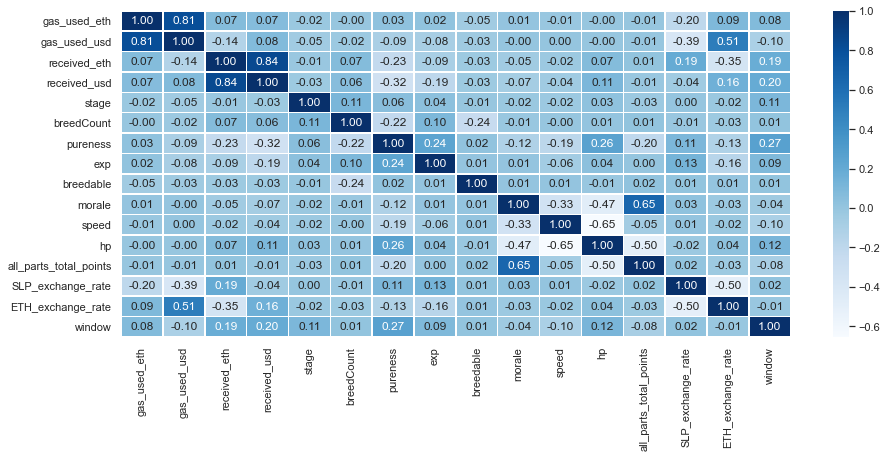

In [28]:
df_corr = df_group.iloc[:,[2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, -1, -2, 6]]
sns.heatmap(data = df_corr.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

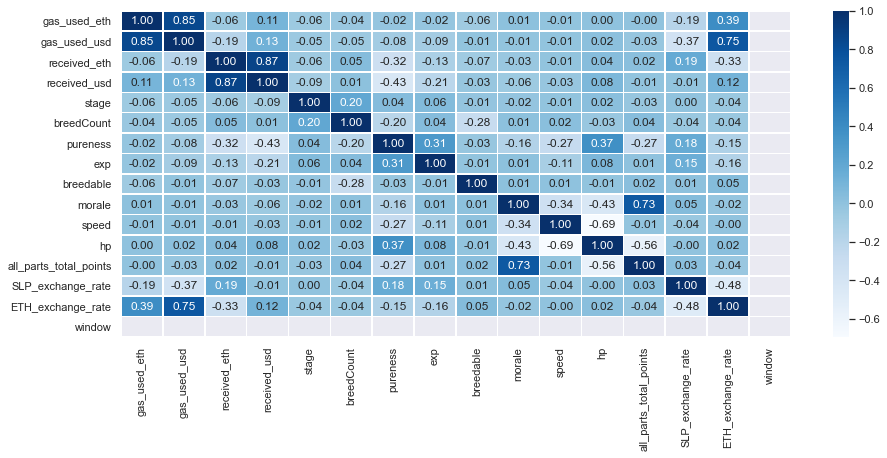

In [29]:
sns.heatmap(data = df_corr[df_corr['window'] == 1].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

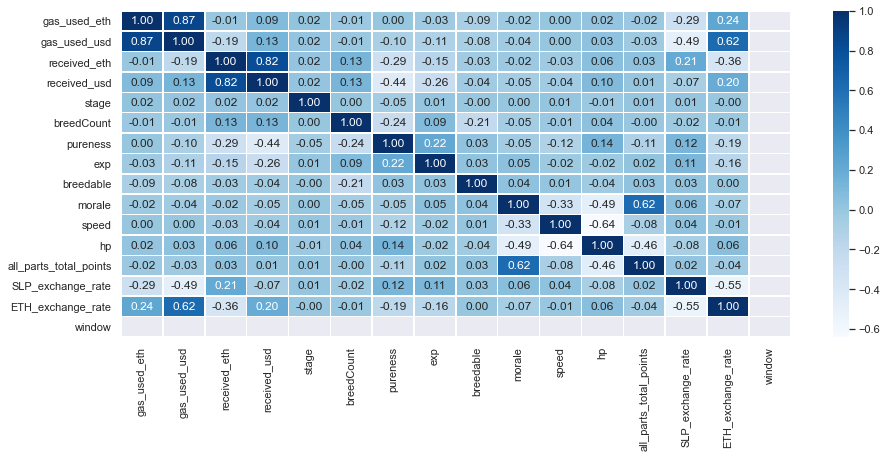

In [30]:
sns.heatmap(data = df_corr[df_corr['window'] == 2].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

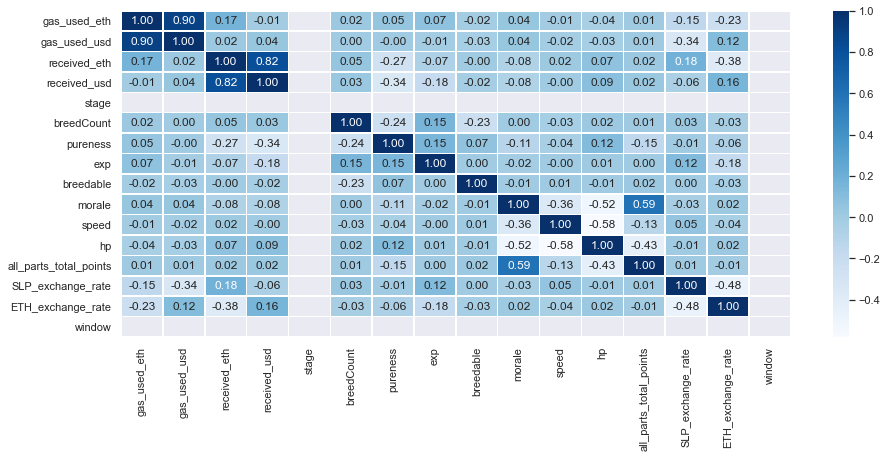

In [31]:
sns.heatmap(data = df_corr[df_corr['window'] == 3].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [32]:
df_quantile

,block_timestamp_x,item_id,gas_used_eth,gas_used_usd,received_eth,received_usd,window,block_date,stage,breedCount,...,tail_move_defense,tail_move_accuracy,tail_move_name,tail_move_type,eyes_class,eyes_name,ears_class,ears_name,ETH_exchange_rate,SLP_exchange_rate
0,2020-10-18 00:04:27,130969,0.002976,1.089065,0.066900,24.662550,1,2020-10-18,4,1,...,4.0,90.0,Quick Shot,ranged,beast,Little Peas,plant,Maiko,368.650470,0.026548
1,2020-10-18 00:06:52,77919,0.005427,2.057815,0.105414,38.861080,1,2020-10-18,4,0,...,4.0,90.0,Quick Shot,ranged,bird,Mavis,beast,Innocent Lamb,368.650470,0.026548
2,2020-10-18 00:06:52,77952,0.005777,2.190577,0.105404,38.857403,1,2020-10-18,4,1,...,1.0,82.0,Risky Feather,ranged,aquatic,Clear,beast,Puppy,368.650470,0.026548
3,2020-10-18 00:24:01,159530,0.013334,4.880119,0.175551,64.716827,1,2020-10-18,4,0,...,1.0,82.0,Risky Feather,ranged,bird,Mavis,bird,Peace Maker,368.650470,0.026548
4,2020-10-18 00:24:09,159529,0.003519,1.287836,0.183673,67.711246,1,2020-10-18,4,0,...,1.0,82.0,Risky Feather,ranged,bird,Mavis,bird,Owl,368.650470,0.026548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64238,2021-01-15 23:19:18,242898,0.006478,6.771910,0.052836,64.297506,1,2021-01-15,4,0,...,9.0,74.0,Tail Slap,melee,reptile,Topaz,beast,Nyan,1216.914788,0.013017
64239,2021-01-15 23:40:14,45146,0.007371,9.456403,0.034470,41.947053,1,2021-01-15,4,7,...,17.0,74.0,Tiny Swing,melee,aquatic,Telescope,bird,Early Bird,1216.914788,0.013017
64240,2021-01-15 23:51:43,65172,0.007002,8.520302,0.034502,41.985765,1,2021-01-15,4,0,...,5.0,90.0,Nut Throw,ranged,bird,Little Owl,plant,Leafy,1216.914788,0.013017
64241,2021-01-15 23:55:18,229390,0.007003,7.926962,0.043088,52.433816,1,2021-01-15,4,4,...,10.0,74.0,Upstream Swim,melee,aquatic,Clear,aquatic,Bubblemaker,1216.914788,0.013017


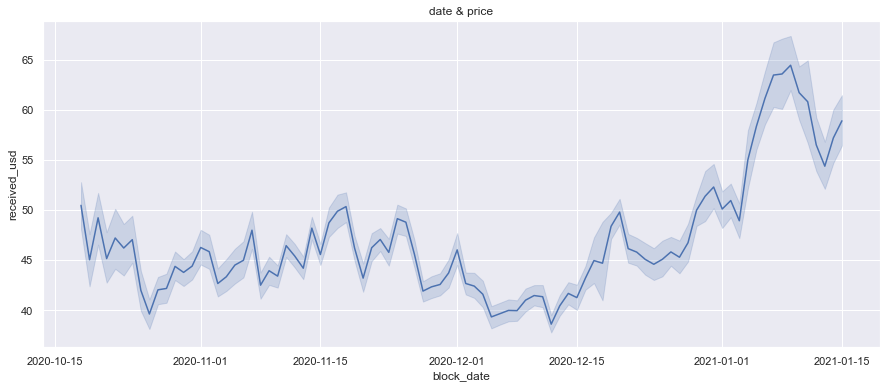

In [33]:
plot= sns.lineplot(data=df_quantile, x="block_date", y='received_usd')
plot.set_title('date & price')
plt.show()

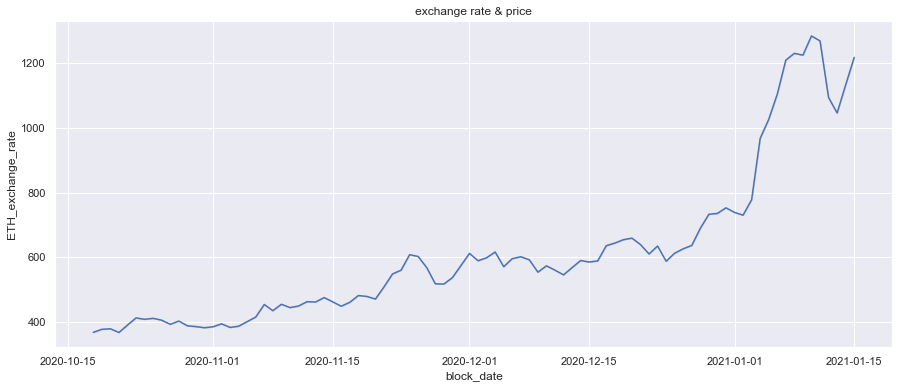

In [34]:
# 시간에 따른 USD/ETH 환율 변화
plot= sns.lineplot(data=df_quantile, x="block_date", y='ETH_exchange_rate')
plot.set_title('exchange rate & price')
plt.show()

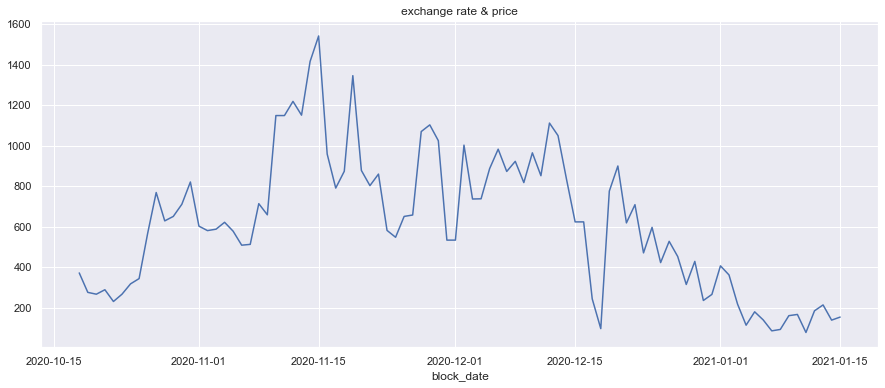

In [35]:
# 시간에 따른 거래량 추이 분석
plot= sns.lineplot(data=df_quantile.groupby('block_date').size(), x="block_date", y=df_quantile.groupby('block_date').size())
plot.set_title('exchange rate & price')
plt.show()

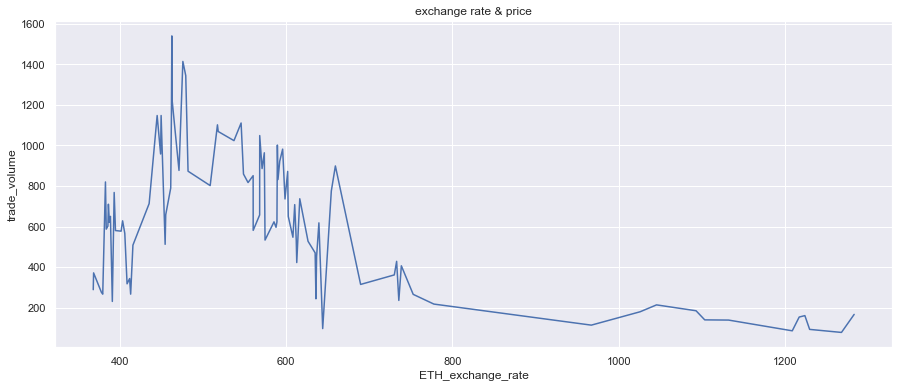

In [36]:
# USD/ETH 환율 변화에 따른 거래량 추이 분석
t1 = df_quantile[['block_date', 'ETH_exchange_rate']]
t2 = df_quantile.groupby('block_date').size()
t3 = pd.merge(t1, t2.reset_index(), on='block_date', how='inner')
t3.rename(columns={0:'trade_volume'}, inplace=True)
t4 = t3.groupby('block_date').first()
t4.reset_index(inplace=True)

plot= sns.lineplot(data=t4, x="ETH_exchange_rate", y='trade_volume')
plot.set_title('exchange rate & price')
plt.show()

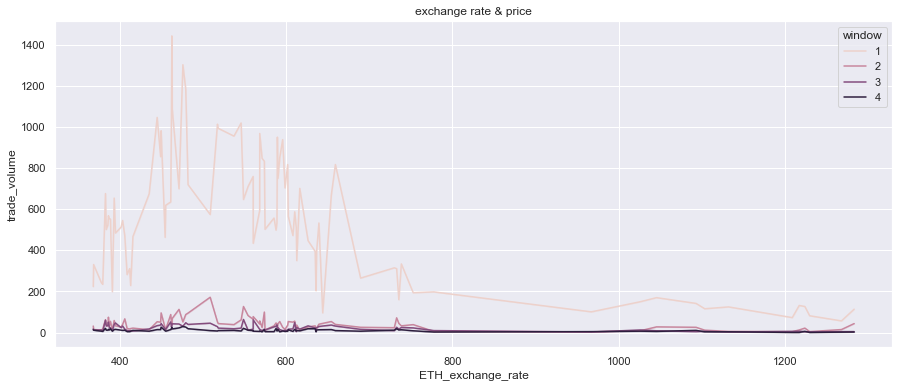

In [37]:
# Window 별 USD/ETH 환율 변화에 따른 거래량 추이 분석
tt1 = df_quantile[['block_date', 'ETH_exchange_rate']]
tt2 = df_quantile.groupby(['block_date', 'window']).size()
tt3 = pd.merge(tt1, tt2.reset_index(), on='block_date', how='inner')
tt3.rename(columns={0:'trade_volume'}, inplace=True)

plot= sns.lineplot(data=tt3, x="ETH_exchange_rate", y='trade_volume', hue='window')
plot.set_title('exchange rate & price')
plt.show()

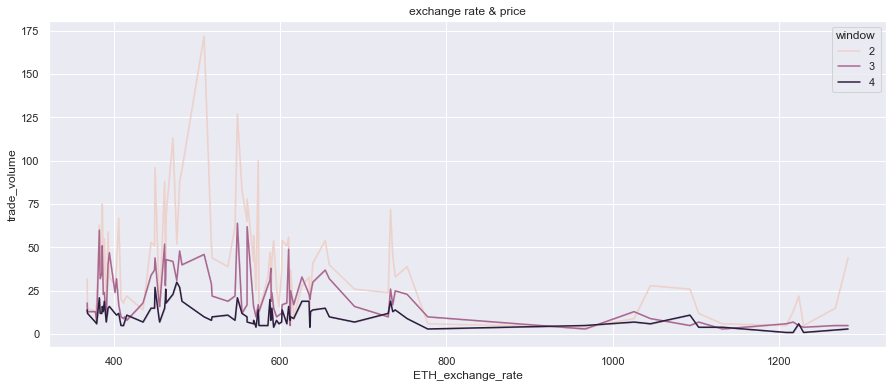

In [38]:
plot= sns.lineplot(data=tt3[tt3['window'] != 1], x="ETH_exchange_rate", y='trade_volume', hue='window')
plot.set_title('exchange rate & price')
plt.show()

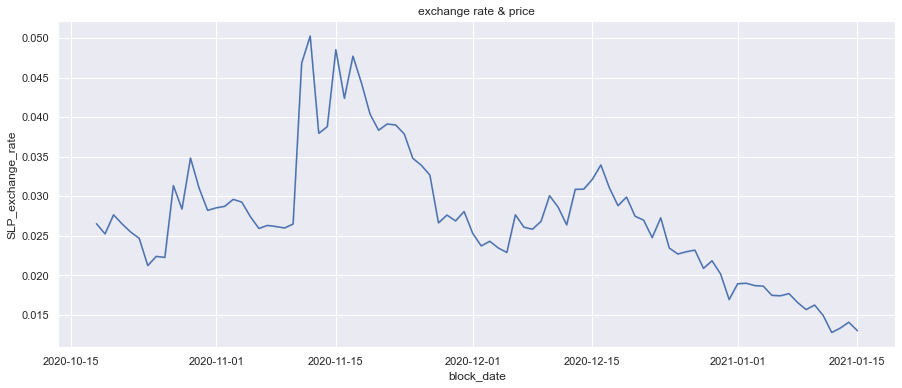

In [39]:
plot= sns.lineplot(data=df_quantile, x="block_date", y='SLP_exchange_rate')
plot.set_title('exchange rate & price')
plt.show()

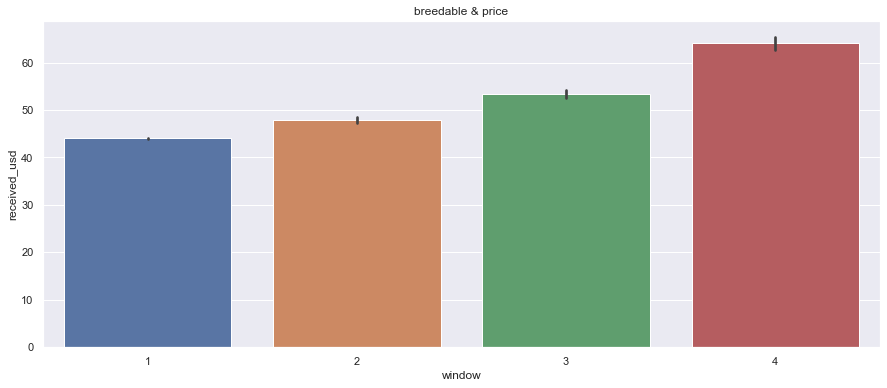

In [40]:
plot= sns.barplot(data=df_quantile, x="window", y='received_usd')
plot.set_title('breedable & price')
plt.show()

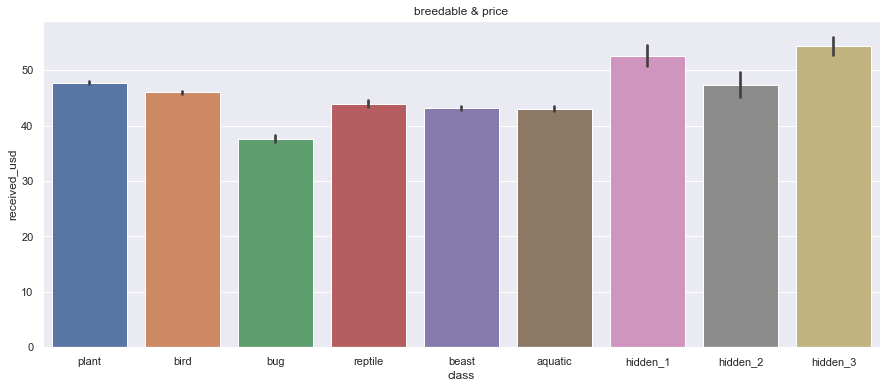

In [41]:
plot= sns.barplot(data=df_quantile, x="class", y='received_usd')
plot.set_title('breedable & price')
plt.show()

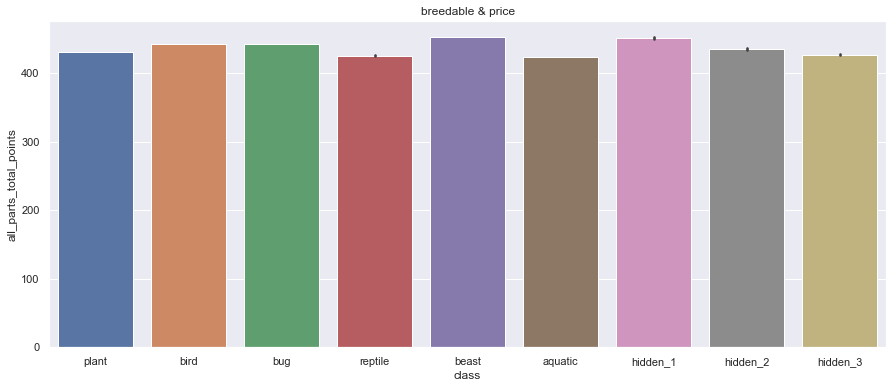

In [42]:
plot = sns.barplot(data=df_quantile, x="class", y='all_parts_total_points')
plot.set_title('breedable & price')
plt.show()

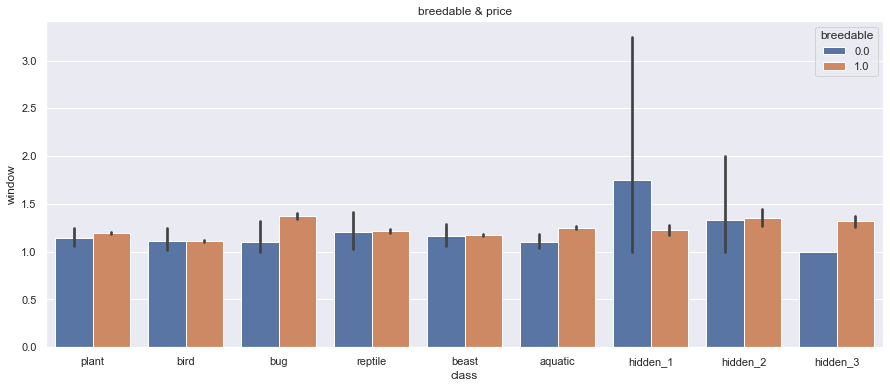

In [43]:
plot = sns.barplot(data=df_quantile, x="class", y='window', hue='breedable')
plot.set_title('breedable & price')
plt.show()

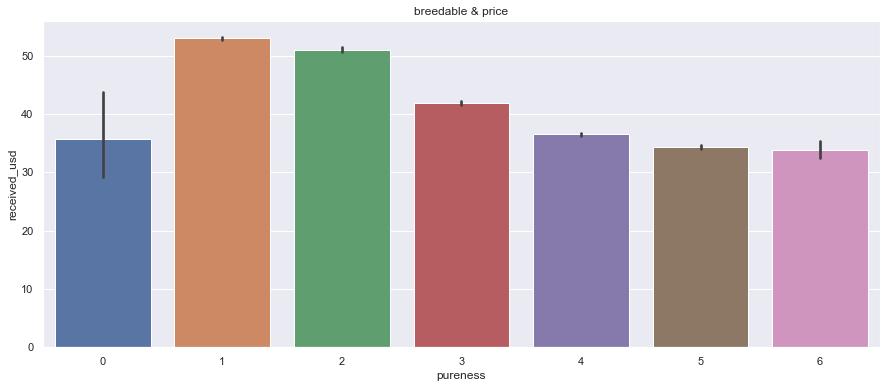

In [44]:
plot = sns.barplot(data=df_quantile, x="pureness", y='received_usd')
plot.set_title('breedable & price')
plt.show()

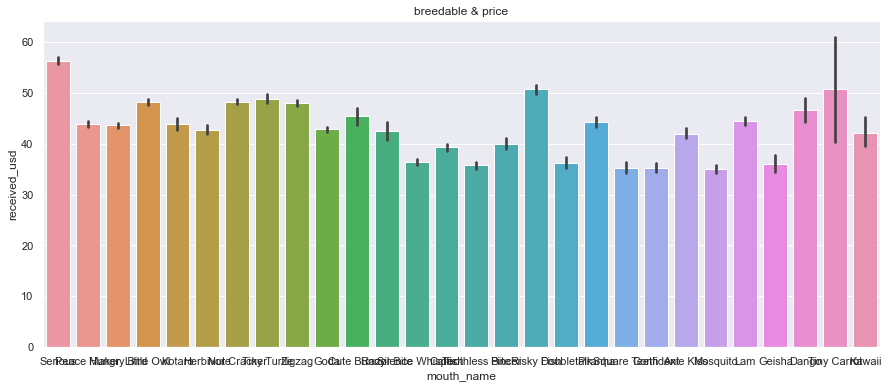

In [45]:
plot = sns.barplot(data=df_quantile, x="mouth_name", y='received_usd')
plot.set_title('breedable & price')
plt.show()

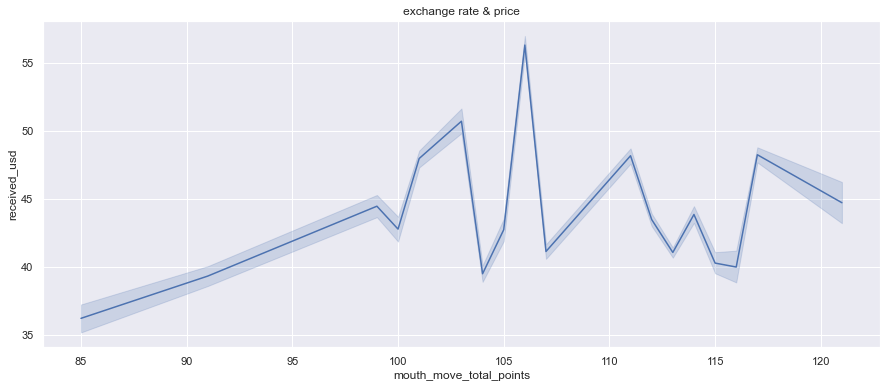

In [46]:
plot= sns.lineplot(data=df_quantile, x="mouth_move_total_points", y='received_usd')
plot.set_title('exchange rate & price')
plt.show()

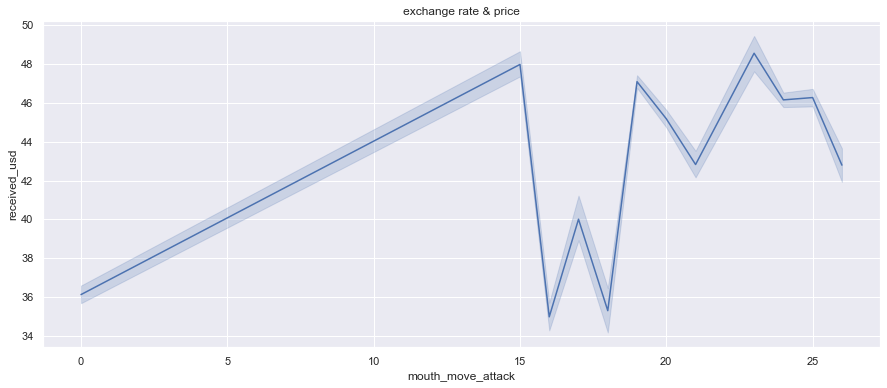

In [47]:
plot= sns.lineplot(data=df_quantile, x="mouth_move_attack", y='received_usd')
plot.set_title('exchange rate & price')
plt.show()

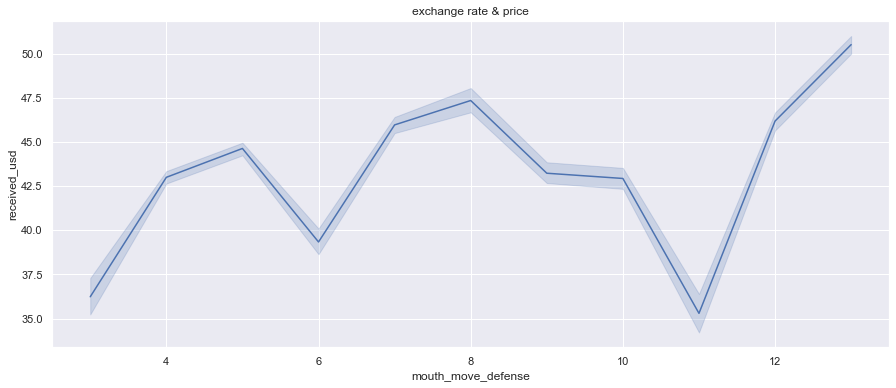

In [48]:
plot= sns.lineplot(data=df_quantile, x="mouth_move_defense", y='received_usd')
plot.set_title('exchange rate & price')
plt.show()

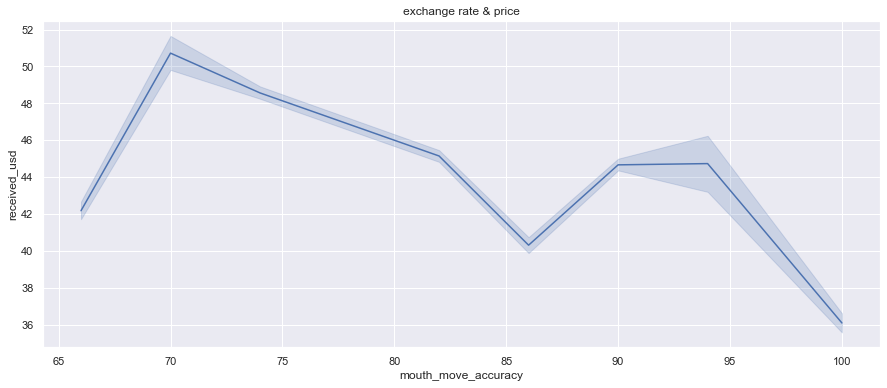

In [49]:
plot= sns.lineplot(data=df_quantile, x="mouth_move_accuracy", y='received_usd')
plot.set_title('exchange rate & price')
plt.show()

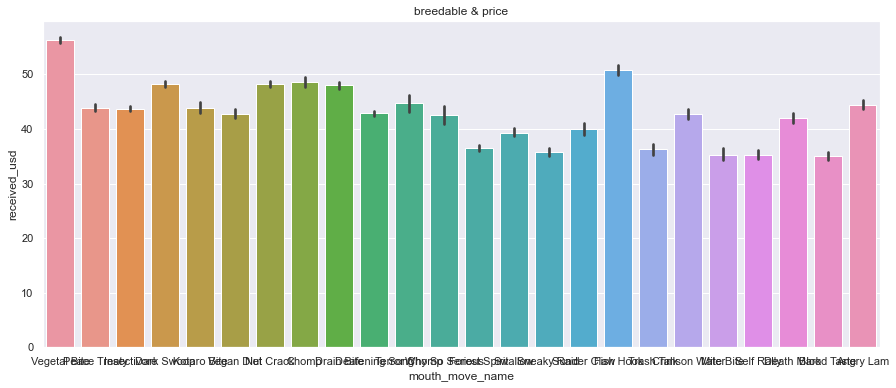

In [50]:
plot = sns.barplot(data=df_quantile, x="mouth_move_name", y='received_usd')
plot.set_title('breedable & price')
plt.show()

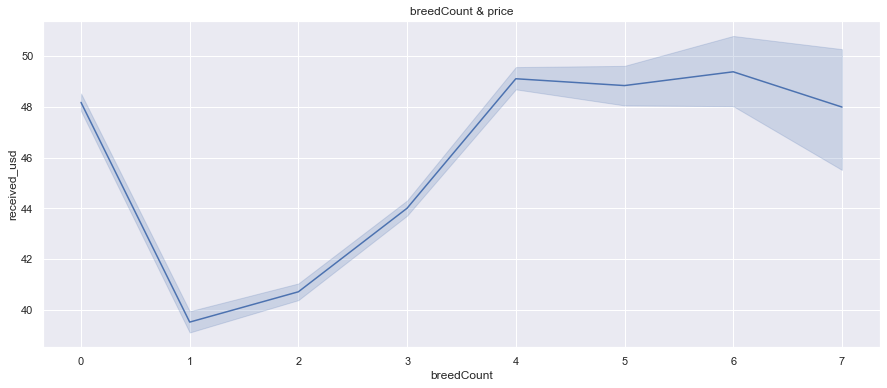

In [51]:
plot3 = sns.lineplot(data=df_quantile, x="breedCount", y='received_usd')
plot3.set_title('breedCount & price')
plt.show()

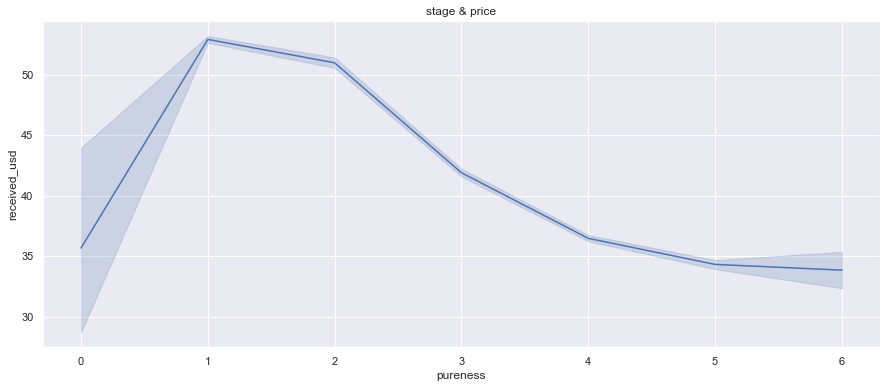

In [52]:
plot4 = sns.lineplot(data=df_quantile, x="pureness", y='received_usd')
plot4.set_title('stage & price')
plt.show()

# Part 2 - 특정 아이템이 1주 / 2주 / 1달간 윈도우 내에서 판매될 확률 예측 모델

## 1. CatBoost Classifier Model - biased data

In [53]:
try:
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from catboost import CatBoostClassifier
except:
    !pip install catboost --use-feature=2020-resolver
    !pip install ipywidgets --use-feature=2020-resolver
    !jupyter nbextension enable --py widgetsnbextension --use-feature=2020-resolver
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from catboost import CatBoostClassifier

In [127]:
df_model = df_quantile[df_quantile['window'] != 4]
df_model.columns

Index(['block_timestamp_x', 'item_id', 'gas_used_eth', 'gas_used_usd',
       'received_eth', 'received_usd', 'window', 'block_date', 'stage',
       'breedCount', 'pureness', 'is_mouth_mystic', 'is_tail_mystic',
       'is_horn_mystic', 'is_back_mystic', 'is_ears_mystic', 'is_eyes_mystic',
       'is_xmas_december_surprise', 'is_xmas_spruce_spear', 'is_xmas_rudolph',
       'is_xmas_candy_canes', 'is_xmas_snowflakes', 'is_xmas_merry_lamb',
       'exp', 'breedable', 'class', 'skill', 'morale', 'speed', 'hp',
       'all_parts_total_points', 'mouth_class', 'mouth_name',
       'mouth_move_stage', 'mouth_move_total_points', 'mouth_move_attack',
       'mouth_move_defense', 'mouth_move_accuracy', 'mouth_move_name',
       'mouth_move_type', 'horn_class', 'horn_name', 'horn_move_stage',
       'horn_move_total_points', 'horn_move_attack', 'horn_move_defense',
       'horn_move_accuracy', 'horn_move_name', 'horn_move_type', 'back_class',
       'back_name', 'back_move_stage', 'back_move_to

In [128]:
df_model

,block_timestamp_x,item_id,gas_used_eth,gas_used_usd,received_eth,received_usd,window,block_date,stage,breedCount,...,tail_move_defense,tail_move_accuracy,tail_move_name,tail_move_type,eyes_class,eyes_name,ears_class,ears_name,ETH_exchange_rate,SLP_exchange_rate
0,2020-10-18 00:04:27,130969,0.002976,1.089065,0.066900,24.662550,1,2020-10-18,4,1,...,4.0,90.0,Quick Shot,ranged,beast,Little Peas,plant,Maiko,368.650470,0.026548
1,2020-10-18 00:06:52,77919,0.005427,2.057815,0.105414,38.861080,1,2020-10-18,4,0,...,4.0,90.0,Quick Shot,ranged,bird,Mavis,beast,Innocent Lamb,368.650470,0.026548
2,2020-10-18 00:06:52,77952,0.005777,2.190577,0.105404,38.857403,1,2020-10-18,4,1,...,1.0,82.0,Risky Feather,ranged,aquatic,Clear,beast,Puppy,368.650470,0.026548
3,2020-10-18 00:24:01,159530,0.013334,4.880119,0.175551,64.716827,1,2020-10-18,4,0,...,1.0,82.0,Risky Feather,ranged,bird,Mavis,bird,Peace Maker,368.650470,0.026548
4,2020-10-18 00:24:09,159529,0.003519,1.287836,0.183673,67.711246,1,2020-10-18,4,0,...,1.0,82.0,Risky Feather,ranged,bird,Mavis,bird,Owl,368.650470,0.026548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64238,2021-01-15 23:19:18,242898,0.006478,6.771910,0.052836,64.297506,1,2021-01-15,4,0,...,9.0,74.0,Tail Slap,melee,reptile,Topaz,beast,Nyan,1216.914788,0.013017
64239,2021-01-15 23:40:14,45146,0.007371,9.456403,0.034470,41.947053,1,2021-01-15,4,7,...,17.0,74.0,Tiny Swing,melee,aquatic,Telescope,bird,Early Bird,1216.914788,0.013017
64240,2021-01-15 23:51:43,65172,0.007002,8.520302,0.034502,41.985765,1,2021-01-15,4,0,...,5.0,90.0,Nut Throw,ranged,bird,Little Owl,plant,Leafy,1216.914788,0.013017
64241,2021-01-15 23:55:18,229390,0.007003,7.926962,0.043088,52.433816,1,2021-01-15,4,4,...,10.0,74.0,Upstream Swim,melee,aquatic,Clear,aquatic,Bubblemaker,1216.914788,0.013017


In [129]:
x = df_model.drop(columns=['block_timestamp_x', 'window', 'is_mouth_mystic', 'is_tail_mystic',
       'is_horn_mystic', 'is_back_mystic', 'is_ears_mystic', 'is_eyes_mystic',
       'is_xmas_december_surprise', 'is_xmas_spruce_spear', 'is_xmas_rudolph',
       'is_xmas_candy_canes', 'is_xmas_snowflakes', 'is_xmas_merry_lamb'])
y = df_model['window']

In [130]:
cat_features = [11, 17, 18, 24, 25, 26, 27, 33, 34, 35, 36, 42, 43, 44, 45, 51, 52, 53, 54, 55, 56]

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle=False)

In [132]:
pd.DataFrame(x_val).info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 42064 to 51888
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   item_id                  8708 non-null   uint64        
 1   gas_used_eth             8708 non-null   float64       
 2   gas_used_usd             8708 non-null   float64       
 3   received_eth             8708 non-null   float64       
 4   received_usd             8708 non-null   float64       
 5   block_date               8708 non-null   datetime64[ns]
 6   stage                    8708 non-null   int64         
 7   breedCount               8708 non-null   int64         
 8   pureness                 8708 non-null   int64         
 9   exp                      8708 non-null   float64       
 10  breedable                8708 non-null   float64       
 11  class                    8708 non-null   object        
 12  skill                    8708

In [133]:
clf = CatBoostClassifier(iterations=393, learning_rate=0.01)
clf.fit(x_train, y_train, cat_features=cat_features, eval_set=(x_val, y_val), verbose=True)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

0:	learn: 1.0843674	test: 1.0823893	best: 1.0823893 (0)	total: 108ms	remaining: 42.4s
1:	learn: 1.0703450	test: 1.0672678	best: 1.0672678 (1)	total: 224ms	remaining: 43.8s
2:	learn: 1.0568537	test: 1.0526317	best: 1.0526317 (2)	total: 335ms	remaining: 43.6s
3:	learn: 1.0435847	test: 1.0379808	best: 1.0379808 (3)	total: 447ms	remaining: 43.4s
4:	learn: 1.0309022	test: 1.0245929	best: 1.0245929 (4)	total: 556ms	remaining: 43.1s
5:	learn: 1.0184245	test: 1.0110631	best: 1.0110631 (5)	total: 670ms	remaining: 43.2s
6:	learn: 1.0062030	test: 0.9974474	best: 0.9974474 (6)	total: 774ms	remaining: 42.7s
7:	learn: 0.9942697	test: 0.9839199	best: 0.9839199 (7)	total: 906ms	remaining: 43.6s
8:	learn: 0.9826690	test: 0.9710936	best: 0.9710936 (8)	total: 1.04s	remaining: 44.2s
9:	learn: 0.9713901	test: 0.9584724	best: 0.9584724 (9)	total: 1.17s	remaining: 44.7s
10:	learn: 0.9604422	test: 0.9465302	best: 0.9465302 (10)	total: 1.29s	remaining: 44.8s
11:	learn: 0.9498241	test: 0.9354349	best: 0.9354349

94:	learn: 0.5207073	test: 0.4668235	best: 0.4668235 (94)	total: 7.38s	remaining: 23.1s
95:	learn: 0.5182269	test: 0.4641043	best: 0.4641043 (95)	total: 7.49s	remaining: 23.2s
96:	learn: 0.5158620	test: 0.4613166	best: 0.4613166 (96)	total: 7.6s	remaining: 23.2s
97:	learn: 0.5135012	test: 0.4586160	best: 0.4586160 (97)	total: 7.72s	remaining: 23.2s
98:	learn: 0.5113064	test: 0.4560242	best: 0.4560242 (98)	total: 7.77s	remaining: 23.1s
99:	learn: 0.5091486	test: 0.4534292	best: 0.4534292 (99)	total: 7.8s	remaining: 22.9s
100:	learn: 0.5069442	test: 0.4511072	best: 0.4511072 (100)	total: 7.91s	remaining: 22.9s
101:	learn: 0.5044872	test: 0.4486198	best: 0.4486198 (101)	total: 8.03s	remaining: 22.9s
102:	learn: 0.5022159	test: 0.4461345	best: 0.4461345 (102)	total: 8.15s	remaining: 22.9s
103:	learn: 0.5000821	test: 0.4438297	best: 0.4438297 (103)	total: 8.26s	remaining: 23s
104:	learn: 0.4981929	test: 0.4419156	best: 0.4419156 (104)	total: 8.28s	remaining: 22.7s
105:	learn: 0.4960944	test

187:	learn: 0.3889177	test: 0.3311514	best: 0.3311514 (187)	total: 16.3s	remaining: 17.7s
188:	learn: 0.3881624	test: 0.3303819	best: 0.3303819 (188)	total: 16.4s	remaining: 17.7s
189:	learn: 0.3873467	test: 0.3295900	best: 0.3295900 (189)	total: 16.5s	remaining: 17.6s
190:	learn: 0.3867058	test: 0.3288866	best: 0.3288866 (190)	total: 16.6s	remaining: 17.5s
191:	learn: 0.3859773	test: 0.3281450	best: 0.3281450 (191)	total: 16.7s	remaining: 17.5s
192:	learn: 0.3851166	test: 0.3274492	best: 0.3274492 (192)	total: 16.8s	remaining: 17.4s
193:	learn: 0.3843339	test: 0.3267261	best: 0.3267261 (193)	total: 16.9s	remaining: 17.4s
194:	learn: 0.3835715	test: 0.3259746	best: 0.3259746 (194)	total: 17s	remaining: 17.3s
195:	learn: 0.3830425	test: 0.3254605	best: 0.3254605 (195)	total: 17.1s	remaining: 17.2s
196:	learn: 0.3825988	test: 0.3250745	best: 0.3250745 (196)	total: 17.1s	remaining: 17s
197:	learn: 0.3816756	test: 0.3244721	best: 0.3244721 (197)	total: 17.2s	remaining: 17s
198:	learn: 0.38

280:	learn: 0.3372240	test: 0.2949441	best: 0.2949441 (280)	total: 26s	remaining: 10.4s
281:	learn: 0.3368996	test: 0.2947459	best: 0.2947459 (281)	total: 26.1s	remaining: 10.3s
282:	learn: 0.3367912	test: 0.2946949	best: 0.2946949 (282)	total: 26.1s	remaining: 10.1s
283:	learn: 0.3364901	test: 0.2945560	best: 0.2945560 (283)	total: 26.2s	remaining: 10.1s
284:	learn: 0.3363853	test: 0.2945077	best: 0.2945077 (284)	total: 26.3s	remaining: 9.95s
285:	learn: 0.3360733	test: 0.2943403	best: 0.2943403 (285)	total: 26.4s	remaining: 9.86s
286:	learn: 0.3356404	test: 0.2942130	best: 0.2942130 (286)	total: 26.5s	remaining: 9.78s
287:	learn: 0.3354133	test: 0.2940923	best: 0.2940923 (287)	total: 26.6s	remaining: 9.69s
288:	learn: 0.3351809	test: 0.2939453	best: 0.2939453 (288)	total: 26.7s	remaining: 9.59s
289:	learn: 0.3347092	test: 0.2937243	best: 0.2937243 (289)	total: 26.8s	remaining: 9.5s
290:	learn: 0.3343368	test: 0.2935812	best: 0.2935812 (290)	total: 26.9s	remaining: 9.42s
291:	learn: 0

373:	learn: 0.3112016	test: 0.2877895	best: 0.2877228 (366)	total: 36.3s	remaining: 1.84s
374:	learn: 0.3110455	test: 0.2877288	best: 0.2877228 (366)	total: 36.4s	remaining: 1.75s
375:	learn: 0.3105849	test: 0.2877905	best: 0.2877228 (366)	total: 36.5s	remaining: 1.65s
376:	learn: 0.3103740	test: 0.2877243	best: 0.2877228 (366)	total: 36.6s	remaining: 1.55s
377:	learn: 0.3100094	test: 0.2878128	best: 0.2877228 (366)	total: 36.7s	remaining: 1.46s
378:	learn: 0.3097509	test: 0.2878327	best: 0.2877228 (366)	total: 36.8s	remaining: 1.36s
379:	learn: 0.3094873	test: 0.2878154	best: 0.2877228 (366)	total: 36.9s	remaining: 1.26s
380:	learn: 0.3092709	test: 0.2878274	best: 0.2877228 (366)	total: 37.1s	remaining: 1.17s
381:	learn: 0.3091337	test: 0.2877910	best: 0.2877228 (366)	total: 37.2s	remaining: 1.07s
382:	learn: 0.3088993	test: 0.2878448	best: 0.2877228 (366)	total: 37.3s	remaining: 974ms
383:	learn: 0.3087912	test: 0.2878387	best: 0.2877228 (366)	total: 37.4s	remaining: 877ms
384:	learn

In [135]:
result_prob = clf.predict_proba(data=x_test)
result_label = clf.predict(data=x_test)

In [136]:
pd.DataFrame(result_label).value_counts()

1    10885
dtype: int64

## 2. CatBoost Classifier Model - unbiased data

In [149]:
df_model_v2 = df_model.groupby('window').sample(n=2050, random_state = 0).sort_values('block_timestamp_x')
X = df_model_v2.drop(columns=['block_timestamp_x', 'window', 'is_mouth_mystic', 'is_tail_mystic',
       'is_horn_mystic', 'is_back_mystic', 'is_ears_mystic', 'is_eyes_mystic',
       'is_xmas_december_surprise', 'is_xmas_spruce_spear', 'is_xmas_rudolph',
       'is_xmas_candy_canes', 'is_xmas_snowflakes', 'is_xmas_merry_lamb'])
Y = df_model_v2['window']

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=False)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, shuffle=False)

clf = CatBoostClassifier(iterations=393, learning_rate=0.01)
clf.fit(X_train, Y_train, cat_features=cat_features, eval_set=(X_val, Y_val), verbose=True)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

0:	learn: 1.0958721	test: 1.0956499	best: 1.0956499 (0)	total: 34.9ms	remaining: 13.7s
1:	learn: 1.0930819	test: 1.0930069	best: 1.0930069 (1)	total: 79.9ms	remaining: 15.6s
2:	learn: 1.0905847	test: 1.0903053	best: 1.0903053 (2)	total: 103ms	remaining: 13.4s
3:	learn: 1.0881628	test: 1.0877122	best: 1.0877122 (3)	total: 121ms	remaining: 11.7s
4:	learn: 1.0855524	test: 1.0847164	best: 1.0847164 (4)	total: 162ms	remaining: 12.6s
5:	learn: 1.0824239	test: 1.0818095	best: 1.0818095 (5)	total: 203ms	remaining: 13.1s
6:	learn: 1.0799234	test: 1.0795321	best: 1.0795321 (6)	total: 250ms	remaining: 13.8s
7:	learn: 1.0769862	test: 1.0769632	best: 1.0769632 (7)	total: 298ms	remaining: 14.3s
8:	learn: 1.0746673	test: 1.0745760	best: 1.0745760 (8)	total: 325ms	remaining: 13.9s
9:	learn: 1.0714063	test: 1.0718543	best: 1.0718543 (9)	total: 359ms	remaining: 13.7s
10:	learn: 1.0686569	test: 1.0693144	best: 1.0693144 (10)	total: 406ms	remaining: 14.1s
11:	learn: 1.0663428	test: 1.0670169	best: 1.06701

94:	learn: 0.9281949	test: 0.9934759	best: 0.9934759 (94)	total: 4.43s	remaining: 13.9s
95:	learn: 0.9274481	test: 0.9929642	best: 0.9929642 (95)	total: 4.48s	remaining: 13.9s
96:	learn: 0.9259518	test: 0.9926955	best: 0.9926955 (96)	total: 4.54s	remaining: 13.8s
97:	learn: 0.9250520	test: 0.9923852	best: 0.9923852 (97)	total: 4.59s	remaining: 13.8s
98:	learn: 0.9244132	test: 0.9923707	best: 0.9923707 (98)	total: 4.63s	remaining: 13.8s
99:	learn: 0.9239310	test: 0.9926098	best: 0.9923707 (98)	total: 4.68s	remaining: 13.7s
100:	learn: 0.9230477	test: 0.9925930	best: 0.9923707 (98)	total: 4.73s	remaining: 13.7s
101:	learn: 0.9217315	test: 0.9926207	best: 0.9923707 (98)	total: 4.78s	remaining: 13.6s
102:	learn: 0.9204562	test: 0.9924331	best: 0.9923707 (98)	total: 4.83s	remaining: 13.6s
103:	learn: 0.9191310	test: 0.9919868	best: 0.9919868 (103)	total: 4.88s	remaining: 13.6s
104:	learn: 0.9182541	test: 0.9921112	best: 0.9919868 (103)	total: 4.93s	remaining: 13.5s
105:	learn: 0.9168774	tes

188:	learn: 0.8590374	test: 1.0038632	best: 0.9913495 (109)	total: 9.17s	remaining: 9.9s
189:	learn: 0.8586917	test: 1.0044960	best: 0.9913495 (109)	total: 9.22s	remaining: 9.85s
190:	learn: 0.8582245	test: 1.0049296	best: 0.9913495 (109)	total: 9.28s	remaining: 9.81s
191:	learn: 0.8577389	test: 1.0051627	best: 0.9913495 (109)	total: 9.33s	remaining: 9.77s
192:	learn: 0.8572840	test: 1.0057170	best: 0.9913495 (109)	total: 9.38s	remaining: 9.72s
193:	learn: 0.8567288	test: 1.0063422	best: 0.9913495 (109)	total: 9.44s	remaining: 9.68s
194:	learn: 0.8564242	test: 1.0069534	best: 0.9913495 (109)	total: 9.49s	remaining: 9.64s
195:	learn: 0.8559403	test: 1.0071875	best: 0.9913495 (109)	total: 9.55s	remaining: 9.6s
196:	learn: 0.8556022	test: 1.0071524	best: 0.9913495 (109)	total: 9.6s	remaining: 9.55s
197:	learn: 0.8546053	test: 1.0074362	best: 0.9913495 (109)	total: 9.65s	remaining: 9.5s
198:	learn: 0.8541610	test: 1.0077697	best: 0.9913495 (109)	total: 9.7s	remaining: 9.45s
199:	learn: 0.8

282:	learn: 0.8192633	test: 1.0248733	best: 0.9913495 (109)	total: 14s	remaining: 5.43s
283:	learn: 0.8190072	test: 1.0257130	best: 0.9913495 (109)	total: 14s	remaining: 5.39s
284:	learn: 0.8186466	test: 1.0260319	best: 0.9913495 (109)	total: 14.1s	remaining: 5.34s
285:	learn: 0.8180146	test: 1.0260228	best: 0.9913495 (109)	total: 14.1s	remaining: 5.29s
286:	learn: 0.8176931	test: 1.0262290	best: 0.9913495 (109)	total: 14.2s	remaining: 5.24s
287:	learn: 0.8175074	test: 1.0264092	best: 0.9913495 (109)	total: 14.2s	remaining: 5.19s
288:	learn: 0.8174112	test: 1.0264317	best: 0.9913495 (109)	total: 14.3s	remaining: 5.14s
289:	learn: 0.8167178	test: 1.0264282	best: 0.9913495 (109)	total: 14.4s	remaining: 5.1s
290:	learn: 0.8162869	test: 1.0265804	best: 0.9913495 (109)	total: 14.4s	remaining: 5.05s
291:	learn: 0.8156937	test: 1.0264281	best: 0.9913495 (109)	total: 14.5s	remaining: 5s
292:	learn: 0.8152879	test: 1.0266941	best: 0.9913495 (109)	total: 14.5s	remaining: 4.95s
293:	learn: 0.8147

377:	learn: 0.7903609	test: 1.0393722	best: 0.9913495 (109)	total: 19s	remaining: 754ms
378:	learn: 0.7902238	test: 1.0395697	best: 0.9913495 (109)	total: 19.1s	remaining: 704ms
379:	learn: 0.7899196	test: 1.0396753	best: 0.9913495 (109)	total: 19.1s	remaining: 654ms
380:	learn: 0.7897627	test: 1.0403273	best: 0.9913495 (109)	total: 19.2s	remaining: 604ms
381:	learn: 0.7895918	test: 1.0404738	best: 0.9913495 (109)	total: 19.2s	remaining: 553ms
382:	learn: 0.7892719	test: 1.0409294	best: 0.9913495 (109)	total: 19.3s	remaining: 503ms
383:	learn: 0.7888028	test: 1.0413863	best: 0.9913495 (109)	total: 19.3s	remaining: 453ms
384:	learn: 0.7885946	test: 1.0416301	best: 0.9913495 (109)	total: 19.4s	remaining: 402ms
385:	learn: 0.7883317	test: 1.0420556	best: 0.9913495 (109)	total: 19.4s	remaining: 352ms
386:	learn: 0.7881387	test: 1.0421507	best: 0.9913495 (109)	total: 19.4s	remaining: 302ms
387:	learn: 0.7880211	test: 1.0422261	best: 0.9913495 (109)	total: 19.5s	remaining: 251ms
388:	learn: 

In [151]:
result_prob = clf.predict_proba(data=X_test)
result_label = clf.predict(data=X_test)

In [152]:
prob = []
for row in result_prob:
    prob.append(max(row))

In [158]:
pd.DataFrame(result_label).value_counts()

1    897
2    213
3    120
dtype: int64

In [165]:
for row in result_label:
    print(type(row[0]))
    break

<class 'numpy.int64'>


In [166]:
label = []
for row in result_label:
    if row[0] == 1:
        label.append('1w')
    elif row[0] == 2:
        label.append('2w')
    else:
        label.append('1m')

In [167]:
temp_dict = {"ID": X_test['item_id'], "WINDOW":label, "TARGET":prob}
result_df = pd.DataFrame(temp_dict)
result_df.to_csv('part2_output.csv', index=False)

In [168]:
result_df['WINDOW'].value_counts()

1w    897
2w    213
1m    120
Name: WINDOW, dtype: int64

In [65]:
# from sklearn.metrics import roc_curve, roc_auc_score
# # print(roc_auc_score(Y_test, result_prob[:,1]))

# fpr, tpr, _ = roc_curve(Y_test, result_prob[:,1])

# plt.clf()
# plot.plot(fpr, tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC curve')
# plt.show()

# Part 3 - 특정 지갑 (유저)이 새로운 Axie 아이템 구매할 확률 예측 모델

## 1. Financial Data

In [66]:
axie_financial_events.head()

,partition_id,block_timestamp,nft_transaction_hash,transactions,entity_id,event_type,data_consistency_status,items_sent,items_received,items_sent_count,...,erc20s,gas_used_eth,gas_used_usd,superset_id,transaction_type,transaction_subtype,nft_transfer_type,nft_transfer_subtype,entity_type,item_send_transfer_type
0,axie,2019-08-27 20:18:01 UTC,0x8dde6583d7b5819dc4d55dc3def141faae33c5ff4bda...,[{'transaction_hash': '0x8dde6583d7b5819dc4d55...,0x6be4a7bbb812bfa6a63126ee7b76c8a13529bdb8,buy,unknown,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0x9e8534fd246256abc96b3ff...,-0.001005,-0.189291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,axie,2019-08-26 10:41:02 UTC,0x331d9bec49938783465e456b28072d655c903615ec71...,[{'transaction_hash': '0x331d9bec49938783465e4...,0x84957e6c9f6ccfed9c35c850c3903732ed90858a,buy,unknown,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0xda108db8739d269ef127b99...,-0.000424,-0.079043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,axie,2018-11-09 08:16:50 UTC,0x98135b8837820fb12745b6c11f078751117e24ac95b0...,[{'transaction_hash': '0x98135b8837820fb12745b...,0xdc59bdbf8a404a6663505cad3d40890f8aade79f,buy,complete,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0x00000000000000000000000...,-0.001228,-0.261995,axie_directsale_eth,NaN,NaN,NaN,NaN,NaN,NaN
3,axie,2018-10-27 19:23:48 UTC,0xece07ef0ff30bc473c1487c94e6587d5ea1cc389be1f...,[{'transaction_hash': '0xece07ef0ff30bc473c148...,0x20eb02ce7aa8cf1ab840e8fa161359a6c2464523,buy,complete,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0x00000000000000000000000...,-0.002707,-0.550604,axie_directsale_eth,NaN,NaN,NaN,NaN,NaN,NaN
4,axie,2018-10-24 19:36:51 UTC,0x1a47a2973aef294ac37f776d22dcaca9c6c2e32e268d...,[{'transaction_hash': '0x1a47a2973aef294ac37f7...,0x73601fd195e1c6407e21845ed40b0c9d61c37ab1,buy,complete,[],[{'item_id': '0xf5b0a3efb8e8e4c201e2a935f110ea...,0.0,...,[{'erc20_contract': '0x00000000000000000000000...,-0.002835,-0.578556,axie_directsale_eth,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
ff_financial_prep_v1 = axie_financial_events[axie_financial_events['data_consistency_status'] == 'complete']
ff_financial_prep_v2 = ff_financial_prep_v1[ff_financial_prep_v1['event_type'] == 'buy']
ff_financial_prep_v3 = ff_financial_prep_v2.drop(columns=['partition_id', 'data_consistency_status', 'superset_id'])
ff_financial_prep_v3['item_id'] = ff_financial_prep_v3['items_sent'] + ff_financial_prep_v3['items_received']
ff_financial_prep_v4 = ff_financial_prep_v3.drop(columns=['items_sent', 'items_received', 'item_receive_transfer_type', 'item_send_transfer_type', 'nft_transaction_hash', 'event_type', 'items_sent_count'])

# item metadata column과 합치기 위하여 items_id를 전처리 하였다.
fid_list = ff_financial_prep_v4['item_id'].to_list()
fid_list_prep = []
for row in fid_list:
  fid_list_prep.append(int(row[0]['item_id'].split('_')[1]))
ff_financial_prep_v4['item_id'] = fid_list_prep
ff_financial_prep_v5 = ff_financial_prep_v4[ff_financial_prep_v4['entity_type'] == 'buyer']

ff_financial_prep_v6 = ff_financial_prep_v5.drop(columns=['transactions', 'items_received_count', 'nft_transfer_type', 'nft_transfer_subtype', 'entity_type'])

# 음수 값 양수 값으로 변환
ff_financial_prep_v6['gas_used_eth'] = ff_financial_prep_v6['gas_used_eth'] * -1
ff_financial_prep_v6['gas_used_usd'] = ff_financial_prep_v6['gas_used_usd'] * -1


In [68]:
ff_col = ff_financial_prep_v6.columns.to_list()
for col in ff_col:
  try:
    print('# Column Name: ', col)
    print(ff_financial_prep_v5[col].unique())
    print(ff_financial_prep_v5[col].value_counts())
    if ff_financial_prep_v5[col].isna().sum() > 0:
      print('Number of NaN value: ', ff_financial_prep_v5[col].isna().sum())
    print()
  except:
    print("unique module not working")
    print()

# Column Name:  block_timestamp
['2020-11-07 07:09:36 UTC' '2020-04-23 09:32:00 UTC'
 '2020-11-09 05:59:45 UTC' ... '2020-11-19 10:29:48 UTC'
 '2020-11-14 06:03:10 UTC' '2020-11-18 01:38:33 UTC']
2020-12-02 09:50:12 UTC    22
2020-12-13 11:39:00 UTC    21
2020-12-02 05:04:36 UTC    21
2020-12-19 12:09:34 UTC    21
2020-11-23 20:14:28 UTC    21
                           ..
2019-01-31 04:47:14 UTC     1
2020-12-02 22:15:17 UTC     1
2020-10-13 10:34:41 UTC     1
2020-11-21 06:47:06 UTC     1
2020-10-17 03:38:52 UTC     1
Name: block_timestamp, Length: 175624, dtype: int64

# Column Name:  entity_id
['0x4bd6a2f40357f833fa7472069626ba00ae3c99e7'
 '0x1732951b80c737dbb8f367e83e530623bb612e54'
 '0x01dcb4f63840daab69c3506f28b8da9e55320554' ...
 '0x3f965c884c1426c43444c9da4d33d0c9813fa544'
 '0x4ce12cc3d025da7a166b2b178d7f13685e2a4e45'
 '0xe8a2ae9f6c7b507ffe42a5d83e4ade0310458d7f']
0x95a437e4cf18cf243a3a46d3798904b635e25d81    3360
0x6880add29b5e84c543ff745856a0f3368e58f165    2765
0x0ed70f92b8

In [69]:
f_erc20_list = ff_financial_prep_v6['erc20s'].to_list()
eth_eth_list = []
eth_usd_list = []
slp_eth_list = []
slp_usd_list = []

for row in f_erc20_list:
  if len(row) == 2:
    eth_eth_list.append(row[0]['sent_eth'])
    eth_usd_list.append(row[0]['sent_usd'])
    slp_eth_list.append(row[1]['sent_eth'])
    slp_usd_list.append(row[1]['sent_usd'])
  else:
    eth_eth_list.append(row[0]['sent_eth'])
    eth_usd_list.append(row[0]['sent_usd'])
    slp_eth_list.append(0)
    slp_usd_list.append(0)
    
ff_financial_prep_v6['ETH_sent_eth'] = eth_eth_list
ff_financial_prep_v6['ETH_sent_usd'] = eth_usd_list
ff_financial_prep_v6['SLP_sent_eth'] = slp_eth_list
ff_financial_prep_v6['SLP_sent_usd'] = slp_usd_list

ff_financial_prep_v7 = ff_financial_prep_v6.drop(columns=['erc20s'])

In [70]:
ff_financial_prep_v7

,block_timestamp,entity_id,gas_used_eth,gas_used_usd,transaction_type,transaction_subtype,item_id,ETH_sent_eth,ETH_sent_usd,SLP_sent_eth,SLP_sent_usd
264,2020-11-07 07:09:36 UTC,0x4bd6a2f40357f833fa7472069626ba00ae3c99e7,0.008080,3.673378,game,breeding,180342,-0.005000,-2.273258,-0.009671,-4.397235
265,2020-04-23 09:32:00 UTC,0x1732951b80c737dbb8f367e83e530623bb612e54,0.002841,0.517762,game,breeding,147130,-0.002000,-0.364554,-0.023453,-4.272140
266,2020-11-09 05:59:45 UTC,0x01dcb4f63840daab69c3506f28b8da9e55320554,0.008090,3.684000,game,breeding,183104,-0.002517,-1.144309,-0.005000,-2.276792
267,2020-03-17 10:54:55 UTC,0x0b946efae53975b97a0d1d02f75fabf55d0d6a96,0.000634,0.070358,game,breeding,144340,-0.013920,-1.546623,-0.002000,-0.221983
268,2020-12-29 22:28:29 UTC,0x2348b7812e1b4d904fcaefe19a93adbb404aa77e,0.023625,17.316110,game,breeding,240899,-0.005000,-3.664785,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
618498,2020-11-19 17:53:01 UTC,0x1955fb8a66abf772ae91a6221555b7c422f58a7f,0.011821,5.667648,game,breeding,194655,-0.005000,-2.397188,-0.016853,-8.081006
618499,2020-11-19 10:29:48 UTC,0x211aa5a261d74094882c749e11d21aec21670404,0.014651,7.024276,game,breeding,194243,-0.005000,-2.397188,-0.025279,-12.121509
618500,2020-11-14 06:03:10 UTC,0x98367264d1b25a5e046dd06f64d728b9dd595a8c,0.006624,3.152694,game,breeding,188287,-0.005000,-2.379845,-0.048869,-23.290204
618501,2020-11-18 01:38:33 UTC,0x3d71ea7f18bcbeff91cfaf55851e923e256d9dc0,0.023516,11.339261,game,breeding,192269,-0.146965,-70.912597,-0.005000,-2.410992


## 2. Axie Item Metadata

In [71]:
# axie_item = pd.read_json('axie_item_metadata.jsonl', lines=True)

In [72]:
# axie_item_v2 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/axie_item_metadata_v2.jsonl', lines=True)

In [169]:
ff_metadata_prep_v1 = axie_item.drop(columns = ['father','fatherClass','mother','motherClass'])

time_list = []
for row in axie_item['block_timestamp']:
  time_list.append(row[:19])

ff_metadata_prep_v1['block_timestamp'] = pd.to_datetime(time_list)

In [170]:
ff_metadata_prep_v1

,item_id,block_timestamp,stage,level,breedCount,pureness,is_mouth_mystic,is_tail_mystic,is_horn_mystic,is_back_mystic,...,tail_move_total_points,tail_move_attack,tail_move_defense,tail_move_accuracy,tail_move_name,tail_move_type,eyes_class,eyes_name,ears_class,ears_name
0,174001,2020-11-02 07:36:32,1,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,225020,2020-12-13 08:46:48,2,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,196148,2020-11-21 07:26:19,1,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,235363,2020-12-21 08:42:11,1,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,216308,2020-12-06 07:54:16,1,1,0,0,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442649,119132,2020-10-21 04:20:21,4,1,1,4,False,False,False,False,...,114.0,17.0,7.0,90.0,Numbing Lecretion,ranged,aquatic,Telescope,beast,Nut Cracker
442650,11239,2020-10-21 18:42:01,4,1,5,4,False,False,False,False,...,114.0,17.0,7.0,90.0,Numbing Lecretion,ranged,bird,Robin,beast,Puppy
442651,6961,2020-10-23 06:11:23,4,1,6,4,False,False,False,False,...,114.0,17.0,7.0,90.0,Numbing Lecretion,ranged,beast,Puppy,beast,Zen
442652,58577,2020-10-22 07:33:10,4,1,3,4,False,False,False,False,...,114.0,17.0,7.0,90.0,Numbing Lecretion,ranged,aquatic,Telescope,aquatic,Gill


In [171]:
ffinancial_time = []
for row in pd.to_datetime(ff_financial_prep_v7['block_timestamp']):
  ffinancial_time.append(datetime.strftime(row, '%Y-%m-%d'))

ff_financial_prep_v7['time'] = pd.to_datetime(ffinancial_time)

In [172]:
fmetadata_time = []
for row in ff_metadata_prep_v1['block_timestamp']:
  fmetadata_time.append(datetime.strftime(row, '%Y-%m-%d'))

ff_metadata_prep_v1['time'] = pd.to_datetime(fmetadata_time)

In [173]:
ff_financial_prep_v7.groupby('entity_id').first()

,block_timestamp,gas_used_eth,gas_used_usd,transaction_type,transaction_subtype,item_id,ETH_sent_eth,ETH_sent_usd,SLP_sent_eth,SLP_sent_usd,time
entity_id,,,,,,,,,,,
0x0002fd0f1d0708fdf065d3625b2ee83d210d58d9,2018-06-17 08:31:05 UTC,0.002531,1.248157,game,breeding,4526,-0.072000,-35.500886,0.000000,0.000000,2018-06-17
0x00077218b3ea0388086e79efad4e4d7021f507f5,2020-11-19 04:16:21 UTC,0.010395,4.983628,game,breeding,193658,-0.005000,-2.397188,-0.040531,-19.434820,2020-11-19
0x0008a44f608c5d9093fd372cacfd04f1ce9bcaba,2020-12-03 09:20:37 UTC,0.003298,1.974575,auction,matched,195647,-0.049390,-29.572787,0.000000,0.000000,2020-12-03
0x0008d343091ef8bd3efa730f6aae5a26a285c7a2,2019-12-19 16:56:16 UTC,0.000302,0.040143,auction,matched,64324,-0.005529,-0.733911,0.000000,0.000000,2019-12-19
0x001025916e0105b38f59eeb583382982cecb9e8f,2019-04-26 07:14:47 UTC,0.001915,0.294801,game,breeding,53547,-0.014000,-2.155026,0.000000,0.000000,2019-04-26
...,...,...,...,...,...,...,...,...,...,...,...
0xffdf94fd422fde451d5eb262be02e489273b9767,2020-11-14 01:08:28 UTC,0.002636,1.254843,auction,matched,160871,-0.175000,-83.294591,0.000000,0.000000,2020-11-14
0xffe6175e311cb76b7ff398494c61a20c0b5c8674,2020-10-23 00:06:38 UTC,0.002638,1.090116,auction,matched,72882,-0.080362,-33.205629,0.000000,0.000000,2020-10-23
0xffeb17441df82ab75d2991501fec8343fc6b92db,2020-12-21 19:24:20 UTC,0.002553,1.632949,auction,matched,229238,-0.047360,-30.287551,0.000000,0.000000,2020-12-21


In [174]:
# financial data와 합치기
ff_merge = pd.merge(ff_metadata_prep_v1, ff_financial_prep_v7, on=["item_id"], how='inner')
ff_merge.sort_values(by=['item_id'], inplace=True)
ff_merge

,item_id,block_timestamp_x,stage,level,breedCount,pureness,is_mouth_mystic,is_tail_mystic,is_horn_mystic,is_back_mystic,...,entity_id,gas_used_eth,gas_used_usd,transaction_type,transaction_subtype,ETH_sent_eth,ETH_sent_usd,SLP_sent_eth,SLP_sent_usd,time_y
409286,6,2020-10-20 14:02:33,4,1,0,4,False,False,False,False,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002072,1.234957,auction,matched,-7.084475,-4221.776374,0.000000,0.000000,2020-12-06
409287,6,2020-10-20 14:02:33,4,1,0,4,False,False,False,False,...,0x86ab846eab1db8ed6f410cbc7c5497de0b7b4536,0.005177,1.237194,auction,matched,-6.000000,-1433.786883,0.000000,0.000000,2020-07-08
409288,6,2020-10-20 14:02:33,4,1,0,4,False,False,False,False,...,0x730952cc677b1f432893d53cbf528baccbbf2441,0.000445,0.169305,auction,matched,-1.019763,-387.797370,0.000000,0.000000,2018-04-05
409289,6,2020-12-07 07:55:19,4,1,0,4,False,False,False,False,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002072,1.234957,auction,matched,-7.084475,-4221.776374,0.000000,0.000000,2020-12-06
409290,6,2020-12-07 07:55:19,4,1,0,4,False,False,False,False,...,0x86ab846eab1db8ed6f410cbc7c5497de0b7b4536,0.005177,1.237194,auction,matched,-6.000000,-1433.786883,0.000000,0.000000,2020-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148084,246186,2021-01-16 07:08:56,1,1,0,0,False,False,False,False,...,0x3c2669c7d407b4a618b6dbcf43811c76856eea5b,0.018314,22.286967,game,breeding,-0.005000,-6.084574,-0.009601,-11.714930,2021-01-15
146910,246187,2021-01-16 07:08:47,1,1,0,0,False,False,False,False,...,0x95af6c5bcaefba9bde7b23497cd4c6066b44bc63,0.017444,21.228336,game,breeding,-0.005000,-6.084574,-0.003200,-3.904977,2021-01-15
305255,246188,2021-01-16 07:08:52,1,1,0,0,False,False,False,False,...,0x10e144318dd4bfe560c89fca0b9c4fd8cccc6611,0.019500,23.729838,game,breeding,-0.000203,-0.247315,-0.005000,-6.084574,2021-01-15
305256,246188,2021-01-25 07:06:09,4,1,0,1,False,False,False,False,...,0x10e144318dd4bfe560c89fca0b9c4fd8cccc6611,0.019500,23.729838,game,breeding,-0.000203,-0.247315,-0.005000,-6.084574,2021-01-15


In [175]:
ff_merge.columns

Index(['item_id', 'block_timestamp_x', 'stage', 'level', 'breedCount',
       'pureness', 'is_mouth_mystic', 'is_tail_mystic', 'is_horn_mystic',
       'is_back_mystic', 'is_ears_mystic', 'is_eyes_mystic',
       'is_xmas_december_surprise', 'is_xmas_spruce_spear', 'is_xmas_rudolph',
       'is_xmas_candy_canes', 'is_xmas_snowflakes', 'is_xmas_merry_lamb',
       'exp', 'breedable', 'class', 'skill', 'morale', 'speed', 'hp',
       'all_parts_total_points', 'mouth_class', 'mouth_name',
       'mouth_move_stage', 'mouth_move_total_points', 'mouth_move_attack',
       'mouth_move_defense', 'mouth_move_accuracy', 'mouth_move_name',
       'mouth_move_type', 'horn_class', 'horn_name', 'horn_move_stage',
       'horn_move_total_points', 'horn_move_attack', 'horn_move_defense',
       'horn_move_accuracy', 'horn_move_name', 'horn_move_type', 'back_class',
       'back_name', 'back_move_stage', 'back_move_total_points',
       'back_move_attack', 'back_move_defense', 'back_move_accuracy',
   

In [176]:
ff_merge_v1 = ff_merge.drop(columns=['block_timestamp_x', 'level', 'is_mouth_mystic', 'is_tail_mystic', 'is_horn_mystic',
       'is_back_mystic', 'is_ears_mystic', 'is_eyes_mystic',
       'is_xmas_december_surprise', 'is_xmas_spruce_spear', 'is_xmas_rudolph',
       'is_xmas_candy_canes', 'is_xmas_snowflakes', 'is_xmas_merry_lamb', 'block_timestamp_y'])
ff_merge_v2 = ff_merge_v1.dropna()
ff_merge_v2

,item_id,stage,breedCount,pureness,exp,breedable,class,skill,morale,speed,...,entity_id,gas_used_eth,gas_used_usd,transaction_type,transaction_subtype,ETH_sent_eth,ETH_sent_usd,SLP_sent_eth,SLP_sent_usd,time_y
409286,6,4,0,4,400.0,1.0,aquatic,35.0,33.0,48.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002072,1.234957,auction,matched,-7.084475,-4221.776374,0.000000,0.000000,2020-12-06
409287,6,4,0,4,400.0,1.0,aquatic,35.0,33.0,48.0,...,0x86ab846eab1db8ed6f410cbc7c5497de0b7b4536,0.005177,1.237194,auction,matched,-6.000000,-1433.786883,0.000000,0.000000,2020-07-08
409288,6,4,0,4,400.0,1.0,aquatic,35.0,33.0,48.0,...,0x730952cc677b1f432893d53cbf528baccbbf2441,0.000445,0.169305,auction,matched,-1.019763,-387.797370,0.000000,0.000000,2018-04-05
409289,6,4,0,4,400.0,1.0,aquatic,35.0,33.0,48.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002072,1.234957,auction,matched,-7.084475,-4221.776374,0.000000,0.000000,2020-12-06
409290,6,4,0,4,400.0,1.0,aquatic,35.0,33.0,48.0,...,0x86ab846eab1db8ed6f410cbc7c5497de0b7b4536,0.005177,1.237194,auction,matched,-6.000000,-1433.786883,0.000000,0.000000,2020-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107295,246183,4,0,3,0.0,1.0,reptile,31.0,47.0,38.0,...,0x37f5927b339b2b067b8c0cf118a0ac9603edbacf,0.020853,25.376370,game,breeding,-0.005000,-6.084574,-0.002134,-2.603318,2021-01-15
200916,246185,4,5,3,0.0,1.0,reptile,31.0,47.0,39.0,...,0x37f5927b339b2b067b8c0cf118a0ac9603edbacf,0.021744,26.460994,game,breeding,-0.006401,-7.809953,-0.005000,-6.084574,2021-01-15
200917,246185,4,5,3,0.0,1.0,reptile,31.0,47.0,39.0,...,0x37f5927b339b2b067b8c0cf118a0ac9603edbacf,0.021744,26.460994,game,breeding,-0.006401,-7.809953,-0.005000,-6.084574,2021-01-15
305256,246188,4,0,1,0.0,1.0,bird,35.0,41.0,61.0,...,0x10e144318dd4bfe560c89fca0b9c4fd8cccc6611,0.019500,23.729838,game,breeding,-0.000203,-0.247315,-0.005000,-6.084574,2021-01-15


In [177]:
ff_merge_v2['entity_id']

409286    0x08797952462b82db639ddbfdef2ab1718ffa7676
409287    0x86ab846eab1db8ed6f410cbc7c5497de0b7b4536
409288    0x730952cc677b1f432893d53cbf528baccbbf2441
409289    0x08797952462b82db639ddbfdef2ab1718ffa7676
409290    0x86ab846eab1db8ed6f410cbc7c5497de0b7b4536
                             ...                    
107295    0x37f5927b339b2b067b8c0cf118a0ac9603edbacf
200916    0x37f5927b339b2b067b8c0cf118a0ac9603edbacf
200917    0x37f5927b339b2b067b8c0cf118a0ac9603edbacf
305256    0x10e144318dd4bfe560c89fca0b9c4fd8cccc6611
305257    0x10e144318dd4bfe560c89fca0b9c4fd8cccc6611
Name: entity_id, Length: 438595, dtype: object

In [178]:
ff_merge_v2[ff_merge_v2['entity_id'] == "0x08797952462b82db639ddbfdef2ab1718ffa7676"]

,item_id,stage,breedCount,pureness,exp,breedable,class,skill,morale,speed,...,entity_id,gas_used_eth,gas_used_usd,transaction_type,transaction_subtype,ETH_sent_eth,ETH_sent_usd,SLP_sent_eth,SLP_sent_usd,time_y
409286,6,4,0,4,400.0,1.0,aquatic,35.0,33.0,48.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002072,1.234957,auction,matched,-7.084475,-4221.776374,0.000000,0.000000,2020-12-06
409289,6,4,0,4,400.0,1.0,aquatic,35.0,33.0,48.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002072,1.234957,auction,matched,-7.084475,-4221.776374,0.000000,0.000000,2020-12-06
357321,40,4,0,4,2834.0,1.0,plant,31.0,39.0,38.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002088,1.244034,auction,matched,-3.096304,-1845.147673,0.000000,0.000000,2020-12-06
357323,40,4,0,4,2834.0,1.0,plant,31.0,39.0,38.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002088,1.244034,auction,matched,-3.096304,-1845.147673,0.000000,0.000000,2020-12-06
485611,195,4,1,5,172.0,1.0,beast,31.0,53.0,41.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.000089,0.035508,auction,matched,-0.165692,-66.073414,0.000000,0.000000,2018-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254681,200431,4,3,1,0.0,1.0,plant,31.0,41.0,31.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.002073,1.184012,auction,matched,-0.151309,-86.426269,0.000000,0.000000,2020-12-05
96048,211573,4,0,2,0.0,1.0,bug,35.0,51.0,31.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.010602,6.251040,game,breeding,-0.005395,-3.180948,-0.005000,-2.947909,2020-12-02
96046,211573,4,5,2,0.0,1.0,bug,35.0,51.0,31.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.010602,6.251040,game,breeding,-0.005395,-3.180948,-0.005000,-2.947909,2020-12-02
183875,220535,4,0,4,0.0,1.0,reptile,31.0,39.0,42.0,...,0x08797952462b82db639ddbfdef2ab1718ffa7676,0.009399,5.567567,game,breeding,-0.005000,-2.961933,-0.008716,-5.169086,2020-12-08
